# Data Cleaning & Preparation

In [1]:
# connect with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import libraries & packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway, kruskal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


In [3]:
#suspress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import dataset
df = pd.read_csv('/content/drive/MyDrive/TechPro/adjusted_retail_sales_data_v2.csv')
# take a look to the first 10 rows
df.head(10)

SalesDate  ProductCategory SalesAmount  CustomerAge CustomerGender  \
0  2023-10-15  Home Appliances         609           22           Male   
1  2023-09-16         Clothing        1367           22         Female   
2  2022-09-06      Electronics        1736           22           Male   
3  2023-02-24           Female        1838           35       Clothing   
4  2022-09-24  Home Appliances        1829           35           Male   
5  2023-08-15         Clothing         379           22           Male   
6  2022-07-19         Clothing        1459           35           Male   
7  12-09-2023         Clothing        1656           35           Male   
8  2022-08-07      Electronics         366           35           Male   
9  2023-12-04         Clothing        1875           35         Female   

  CustomerLocation ProductRatings  
0              USA              4  
1        Australia              5  
2               UK              2  
3            India              2  
4               UK              5  
5        Australia              3  
6              USA              5  
7              USA              3  
8           Canada              2  
9               UK             10

In [5]:
# gain a better understanding about the dataset
print(df.info(), df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SalesDate         1000 non-null   object
 1   ProductCategory   1000 non-null   object
 2   SalesAmount       1000 non-null   object
 3   CustomerAge       1000 non-null   int64 
 4   CustomerGender    1000 non-null   object
 5   CustomerLocation  998 non-null    object
 6   ProductRatings    1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB
None (1000, 7)


In [6]:
# see the variance for every column
variance_result = df.var()
variance_result
# only CustomerAge is int64 so we can see only this variance
# 136.44 is too big variance for age

CustomerAge    136.442113
dtype: float64

In [7]:
# convert SalesDate from object to datetime
df.SalesDate = pd.to_datetime(df.SalesDate)

In [8]:
# gain a better understanding for columns and their unique values.
# see how many times a value appears in the dataset
for i in range(1, len(df.columns)):
    print(df.iloc[:, i].value_counts())

Electronics        357
Clothing           326
Home Appliances    316
Female               1
Name: ProductCategory, dtype: int64
609        14
710        14
466        13
1621       13
1547       13
           ..
3-00        1
1430        1
445         1
1994        1
1875000     1
Name: SalesAmount, Length: 189, dtype: int64
22     506
35     483
105      2
200      1
20       1
95       1
2        1
112      1
100      1
101      1
180      1
120      1
Name: CustomerAge, dtype: int64
Male              488
Female            483
Unknown            23
Non-binary          4
Clothing            1
Did not answer      1
Name: CustomerGender, dtype: int64
USA          207
UK           203
Canada       201
India        167
Australia    113
Japan        107
Name: CustomerLocation, dtype: int64
3      220
2      207
1      196
4      189
5      185
10       1
two      1
one      1
Name: ProductRatings, dtype: int64


In [9]:
# check for null values (NAs)
print(df.isnull().sum())
# check rows where Customer Location is null
print(df[df['CustomerLocation'].isnull()])
# as we see that Customer Age for both missing values is 35, we fill Customer Location with most common Customer Location
df['CustomerLocation'].fillna(df['CustomerLocation'].mode()[0], inplace=True)


SalesDate           0
ProductCategory     0
SalesAmount         0
CustomerAge         0
CustomerGender      0
CustomerLocation    2
ProductRatings      0
dtype: int64
     SalesDate ProductCategory SalesAmount  CustomerAge CustomerGender  \
814 2022-11-16     Electronics        1547           35           Male   
820 2022-02-08        Clothing        1563           35           Male   

    CustomerLocation ProductRatings  
814              NaN              3  
820              NaN              5  


In [10]:
# check if there is any duplicates
df.duplicated().any()

False

In [11]:
# keep only reasonable Customer Age and replace other values with NAs
df['CustomerAge'] = df.loc[(df['CustomerAge'] >= 17) & (df['CustomerAge'] <= 90), 'CustomerAge']
# check how many values are missing
print( "Total NAs = ", df['CustomerAge'].isnull().sum())
# they are less than 10% of total data so we can drop them
df = df.dropna(subset=['CustomerAge'])
# convert to type correct type
df['CustomerAge'] = df['CustomerAge'].astype(int)
# check the first rows
df.head()

Total NAs =  10


SalesDate  ProductCategory SalesAmount  CustomerAge CustomerGender  \
0 2023-10-15  Home Appliances         609           22           Male   
1 2023-09-16         Clothing        1367           22         Female   
2 2022-09-06      Electronics        1736           22           Male   
3 2023-02-24           Female        1838           35       Clothing   
4 2022-09-24  Home Appliances        1829           35           Male   

  CustomerLocation ProductRatings  
0              USA              4  
1        Australia              5  
2               UK              2  
3            India              2  
4               UK              5

In [12]:
#sales_13th_feb = df[df['SalesDate'] == '2022-02-13']
#sales_13th_feb

In [13]:
# replace words with numbers, convert to the correct type, and count the unique values
df['ProductRatings'] = df['ProductRatings'].replace({'two': 2, 'one': 1, '10':5})
df['ProductRatings'] = df['ProductRatings'].astype(np.int64)
df['ProductRatings'].value_counts()

3    219
2    206
1    194
4    188
5    183
Name: ProductRatings, dtype: int64

In [14]:
# create a new column for yearly sales
date_by_year = df.groupby(df['SalesDate'].dt.year).size().reset_index(name='Count_by_year')
df_2022 = df[df['SalesDate'].dt.year == 2022]
df_2023 = df[df['SalesDate'].dt.year == 2023]
# create a new column for monthly sales
date_by_month_2022 = df_2022.groupby(df_2022['SalesDate'].dt.month).size().reset_index(name='Count_by_month')
date_by_month_2023 = df_2023.groupby(df_2023['SalesDate'].dt.month).size().reset_index(name='Count_by_month')
print( 'BY YEAR: \n', date_by_year, '\n BY MONTH WHEN YEAR IS 2022: \n',  date_by_month_2022, '\n BY MONTH WHEN YEAR IS 2023: \n', date_by_month_2023)


BY YEAR: 
    SalesDate  Count_by_year
0       2022            459
1       2023            531 
 BY MONTH WHEN YEAR IS 2022: 
     SalesDate  Count_by_month
0           1              45
1           2              34
2           3              44
3           4              41
4           5              41
5           6              38
6           7              45
7           8              27
8           9              32
9          10              41
10         11              35
11         12              36 
 BY MONTH WHEN YEAR IS 2023: 
     SalesDate  Count_by_month
0           1              44
1           2              34
2           3              41
3           4              48
4           5              50
5           6              45
6           7              41
7           8              44
8           9              39
9          10              46
10         11              45
11         12              54


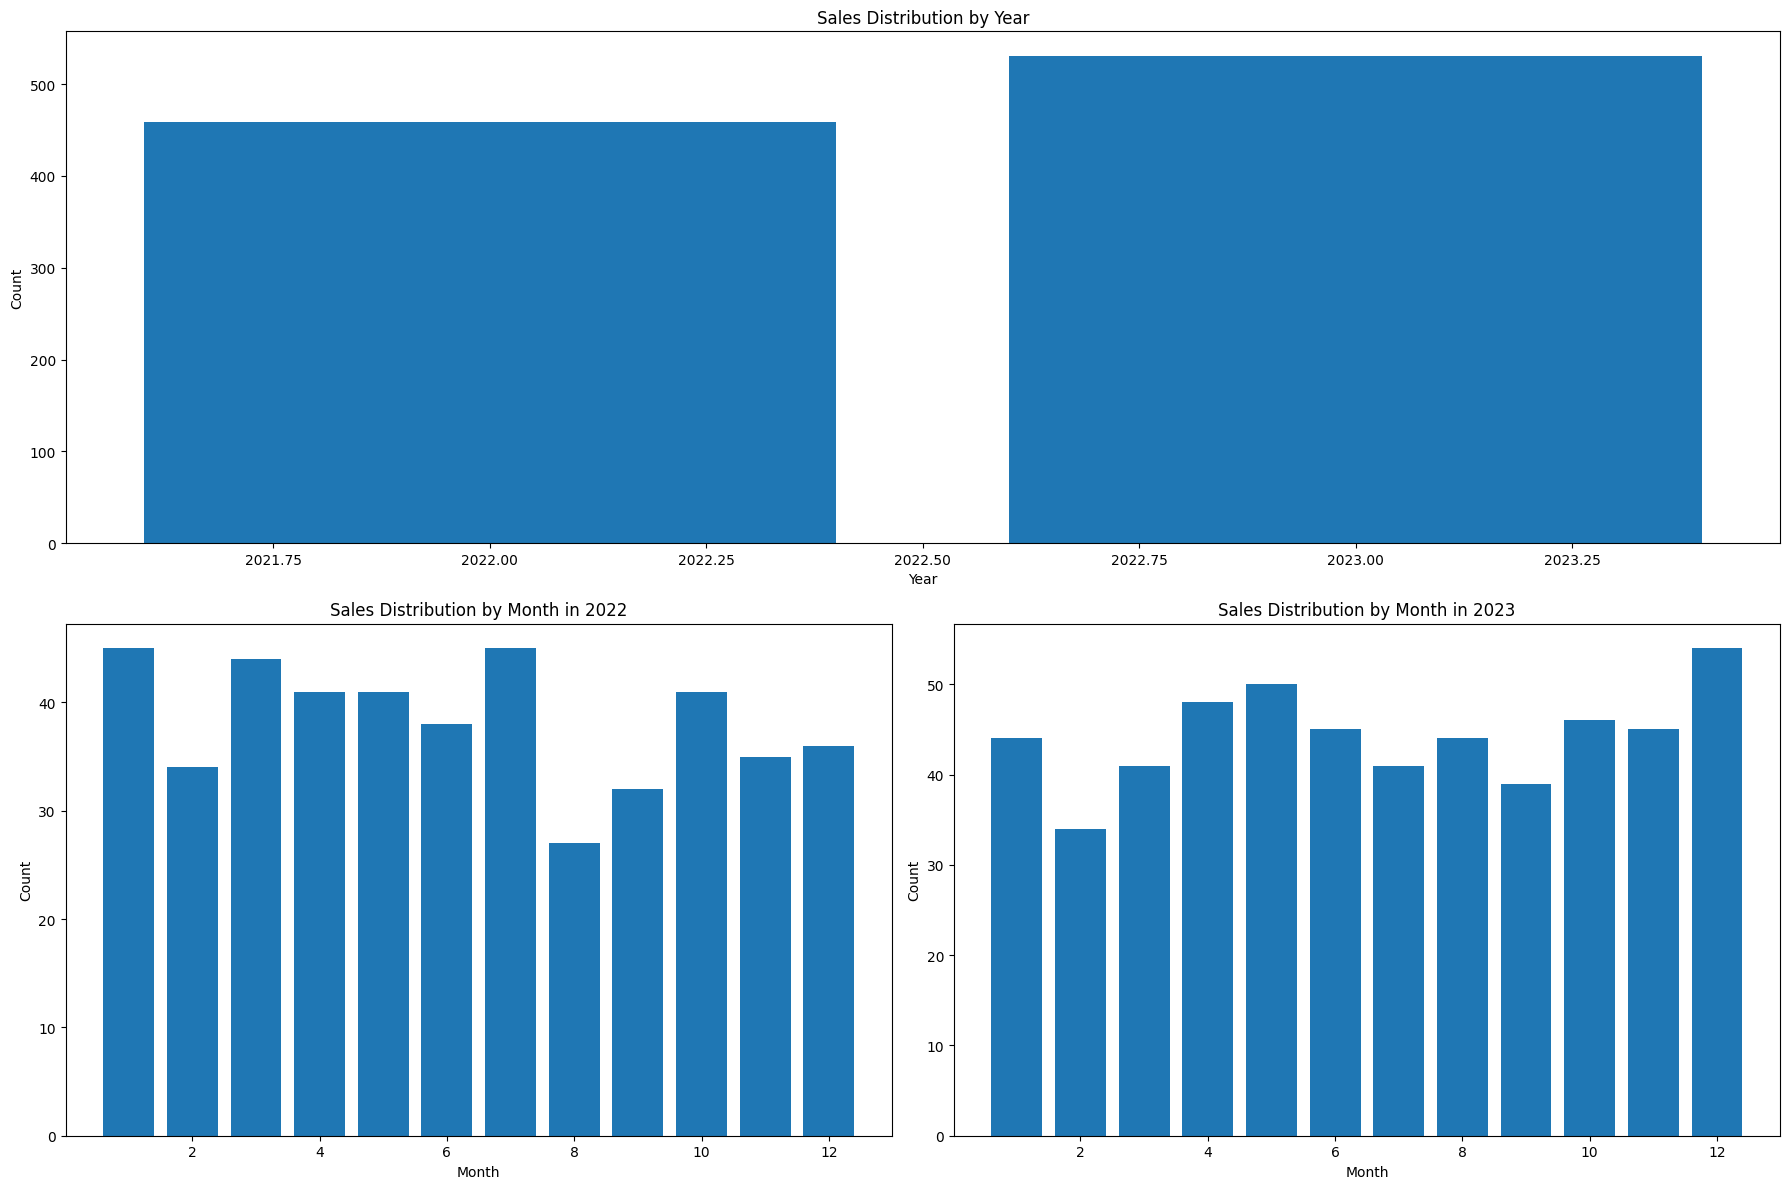

In [15]:
# Plotting distribution by year
plt.figure(figsize=(18, 12))

# Subplot for distribution by year
plt.subplot(2, 1, 1)
plt.bar(date_by_year['SalesDate'], date_by_year['Count_by_year'])
plt.title('Sales Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Subplot for distribution by month in 2022
plt.subplot(2, 2, 3)
plt.bar(date_by_month_2022['SalesDate'], date_by_month_2022['Count_by_month'])
plt.title('Sales Distribution by Month in 2022')
plt.xlabel('Month')
plt.ylabel('Count')

# Subplot for distribution by month in 2023
plt.subplot(2, 2, 4)
plt.bar(date_by_month_2023['SalesDate'], date_by_month_2023['Count_by_month'])
plt.title('Sales Distribution by Month in 2023')
plt.xlabel('Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [16]:
###ERROR###
#date_by_month = df.groupby([df['SalesDate'].dt.year, df['SalesDate'].dt.month]).size().reset_index(name='Count')
#df = pd.merge(df, date_by_month, left_on=[df['SalesDate'].dt.year, df['SalesDate'].dt.month], right_on=['SalesDate', 'SalesDate'], suffixes=('', '_by_month'))


In [17]:
# check if someone confused Product Category with Customer Gender and correct the corresponding row
print(df[df['ProductCategory']=='Female'])
df['ProductCategory'] = df['ProductCategory'].replace('Female', 'Clothing')
df['CustomerGender'] = df['CustomerGender'].replace('Clothing', 'Female')


   SalesDate ProductCategory SalesAmount  CustomerAge CustomerGender  \
3 2023-02-24          Female        1838           35       Clothing   

  CustomerLocation  ProductRatings  
3            India               2  


In [18]:
# Throw away non-numeric symbols from Sales Amount by creating a mask
non_numeric_mask = df['SalesAmount'].str.contains(r'[^0-9]', regex=True)
rows_with_non_numeric = df[non_numeric_mask]
print(rows_with_non_numeric)

df['SalesAmount'] = df['SalesAmount'].replace('[^0-9]', '', regex=True)
# check the result for row 18 & row 72
print(df['SalesAmount'][18], df['SalesAmount'][72])
# convert type to integer
print(df['SalesAmount'].dtype)
df['SalesAmount'] = df['SalesAmount'].astype(int)

     SalesDate  ProductCategory SalesAmount  CustomerAge CustomerGender  \
18  2023-12-22         Clothing        779%           35           Male   
65  2023-08-09      Electronics         3-0           35         Female   
72  2023-09-17  Home Appliances        3-00           35           Male   
290 2023-09-19         Clothing         3-0           22         Female   
472 2022-04-27  Home Appliances         3-0           35        Unknown   
926 2023-11-08      Electronics         3-0           35         Female   

    CustomerLocation  ProductRatings  
18            Canada               5  
65             Japan               3  
72               USA               3  
290            India               1  
472           Canada               3  
926               UK               3  
779 300
object


In [19]:
# clean Customer Gender Column
print(df.CustomerGender.value_counts())
df['CustomerGender'] = df['CustomerGender'].replace('Did not answer', 'Unknown')
print(df.CustomerGender.value_counts())

Male              481
Female            481
Unknown            23
Non-binary          4
Did not answer      1
Name: CustomerGender, dtype: int64
Male          481
Female        481
Unknown        24
Non-binary      4
Name: CustomerGender, dtype: int64


In [20]:
# convert Product Category, Customer Gendr & Customer Location to categorical variables
df['ProductCategory'] = df['ProductCategory'].astype('category')
df['CustomerGender'] = df['CustomerGender'].astype('category')
df['CustomerLocation'] = df['CustomerLocation'].astype('category')

In [21]:
print(df.info())
variance_result = df.var()
variance_result


<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SalesDate         990 non-null    datetime64[ns]
 1   ProductCategory   990 non-null    category      
 2   SalesAmount       990 non-null    int64         
 3   CustomerAge       990 non-null    int64         
 4   CustomerGender    990 non-null    category      
 5   CustomerLocation  990 non-null    category      
 6   ProductRatings    990 non-null    int64         
dtypes: category(3), datetime64[ns](1), int64(3)
memory usage: 74.4 KB
None


SalesAmount       3.547728e+09
CustomerAge       4.229756e+01
ProductRatings    1.921521e+00
dtype: float64

# Descriptive Statistics


In [22]:
# Summary Statistics for integers
summary_stats = df.describe()
summary_stats

SalesAmount  CustomerAge  ProductRatings
count  9.900000e+02   990.000000      990.000000
mean   2.870148e+03    28.340404        2.959596
std    5.956281e+04     6.503657        1.386189
min    2.200000e+01    20.000000        1.000000
25%    5.070000e+02    22.000000        2.000000
50%    9.860000e+02    22.000000        3.000000
75%    1.428000e+03    35.000000        4.000000
max    1.875000e+06    35.000000        5.000000

In [23]:
# Calculate sales statistics
sales_stats = df['SalesAmount'].describe()

# Calculate the mode of sales amount
sales_mode = df['SalesAmount'].mode()

# Define custom formatting function to remove scientific notation
def format_float(x):
    return '{:.2f}'.format(x)

# Set the custom formatting function for float values
pd.options.display.float_format = format_float

# Display sales statistics and mode without scientific notation
print(sales_stats)
print(sales_mode)

# max is much greater than mean & mode. Propably this is an outlier

count       990.00
mean       2870.15
std       59562.81
min          22.00
25%         507.00
50%         986.00
75%        1428.00
max     1875000.00
Name: SalesAmount, dtype: float64
0    609
1    710
Name: SalesAmount, dtype: int64


Typical rating is: 3


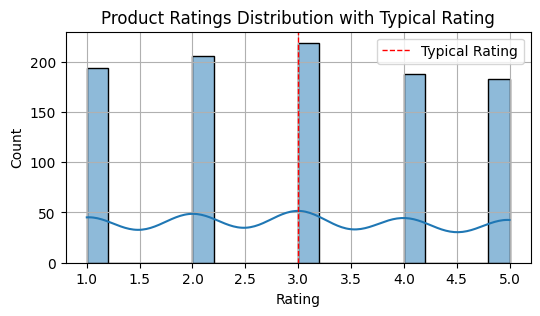

In [24]:
#Distribution of typical ratings
typical_ratings = df['ProductRatings'].mode().iloc[0]
print( 'Typical rating is:', typical_ratings )

plt.figure(figsize=(6, 3))
sns.histplot(df['ProductRatings'], bins=20,kde=True)
plt.axvline(typical_ratings, color='red', linestyle='dashed', linewidth=1, label='Typical Rating')
plt.title('Product Ratings Distribution with Typical Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Calculate the mean ratings per product category
typical_ratings_per_category = df.groupby('ProductCategory')['ProductRatings'].mean()

# Display the mean ratings per product category
print('Mean Ratings per Product Category: \n', typical_ratings_per_category)


Mean Ratings per Product Category: 
 ProductCategory
Clothing          2.97
Electronics       2.85
Home Appliances   3.07
Name: ProductRatings, dtype: float64


Category Rating Counts:
 ProductCategory  ProductRatings
Clothing         1                 72
                 3                 70
                 5                 66
                 4                 59
                 2                 57
Electronics      2                 84
                 1                 73
                 3                 71
                 4                 69
                 5                 54
Home Appliances  3                 78
                 2                 65
                 5                 63
                 4                 60
                 1                 49
Name: ProductRatings, dtype: int64


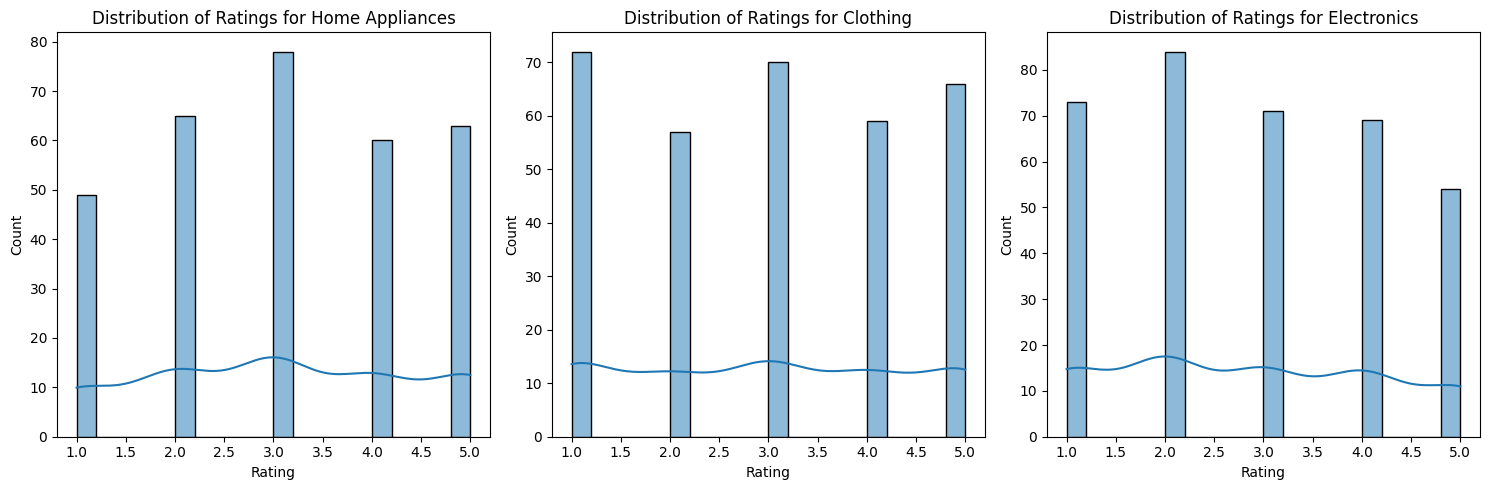

In [26]:
# Category Ratings per product
category_rating_counts = df.groupby('ProductCategory')['ProductRatings'].value_counts()
print("Category Rating Counts:\n",category_rating_counts)

# Get three unique product categories
categories = df['ProductCategory'].unique()[:3]

# Create three histogram plots for each category
plt.figure(figsize=(15, 5))
for i, category in enumerate(categories, start=1):
    plt.subplot(1, 3, i)
    sns.histplot(df[df['ProductCategory'] == category]['ProductRatings'], bins=20, kde=True)
    plt.title(f'Distribution of Ratings for {category}')
    plt.xlabel('Rating')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

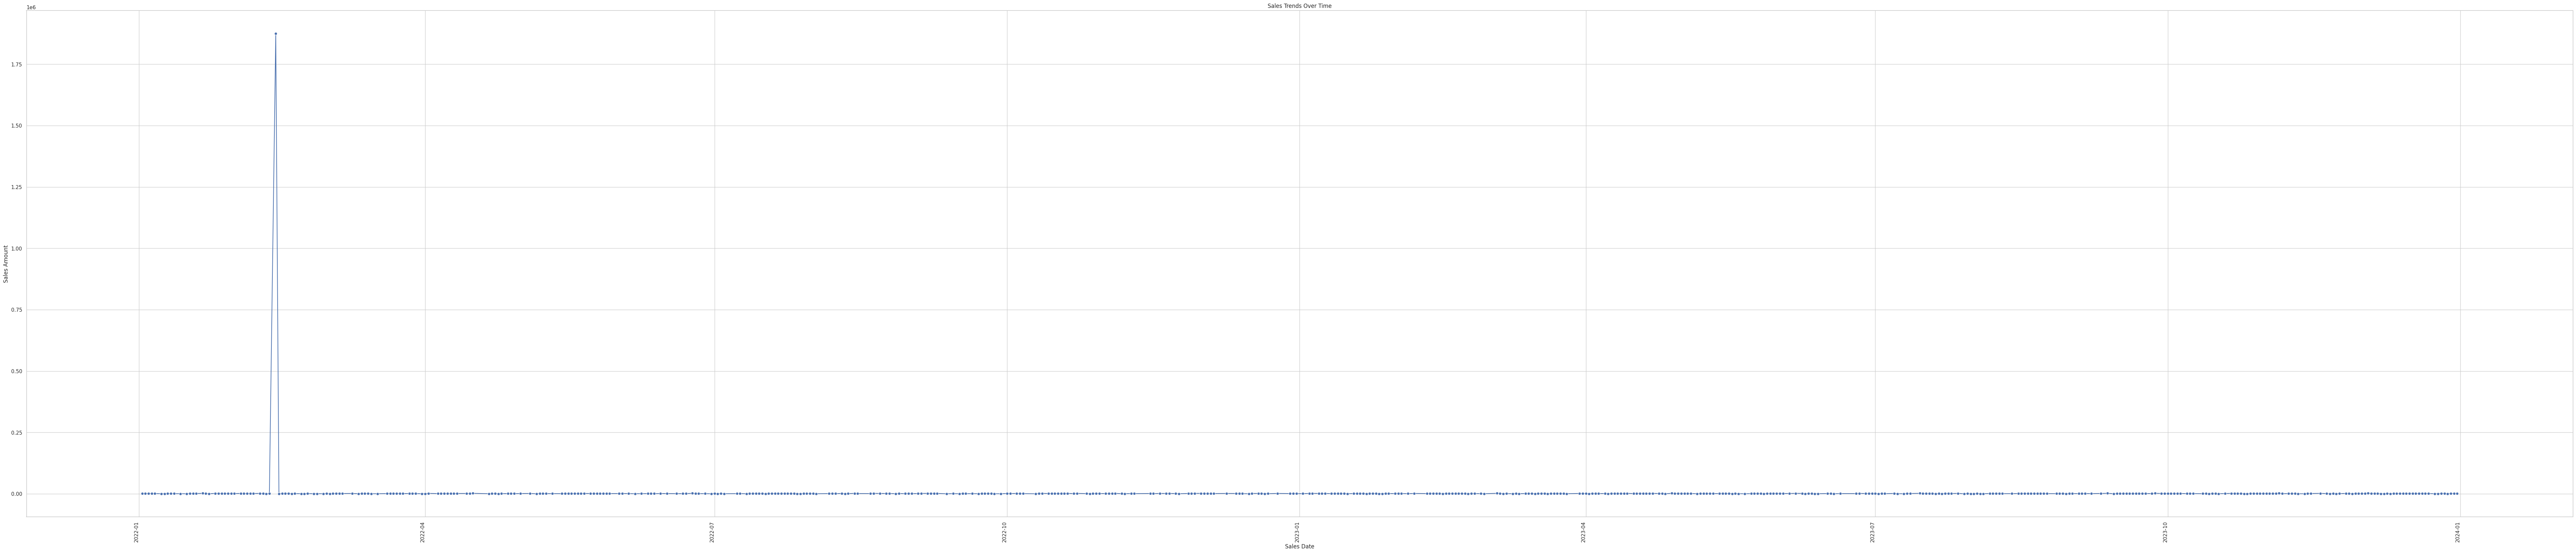

In [27]:
# Sales trends over time (using SalesDate)
sns.set(style="whitegrid")
df = df.sort_values(by='SalesDate')
# Create a lineplot
plt.figure(figsize=(100, 20))
sns.lineplot(x='SalesDate', y='SalesAmount', data=df, marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Sales Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=90, ha='right')
plt.show()
# there is an outlier

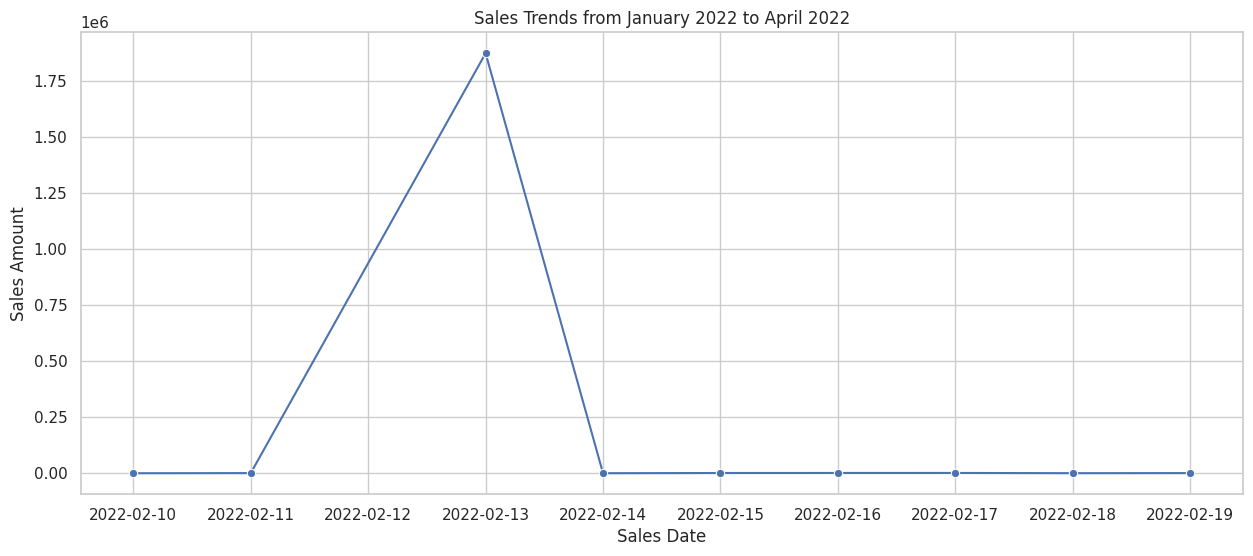

In [28]:
#Detect Outliers
# Filter data for January 2022 to April 2022
filtered_df = df[(df['SalesDate'] >= '2022-02-10') & (df['SalesDate'] <= '2022-02-20')]

# Sales trends over time for the filtered data
plt.figure(figsize=(15, 6))
sns.lineplot(x='SalesDate', y='SalesAmount', data=filtered_df, marker='o')
plt.title('Sales Trends from January 2022 to April 2022')
plt.xlabel('Sales Date')
plt.ylabel('Sales Amount')
plt.show()

In [29]:
#Drop Outlier
sales_on_13th_feb = df[df['SalesDate'] == '2022-02-13']
sales_on_13th_feb
df = df.drop(sales_on_13th_feb.index)

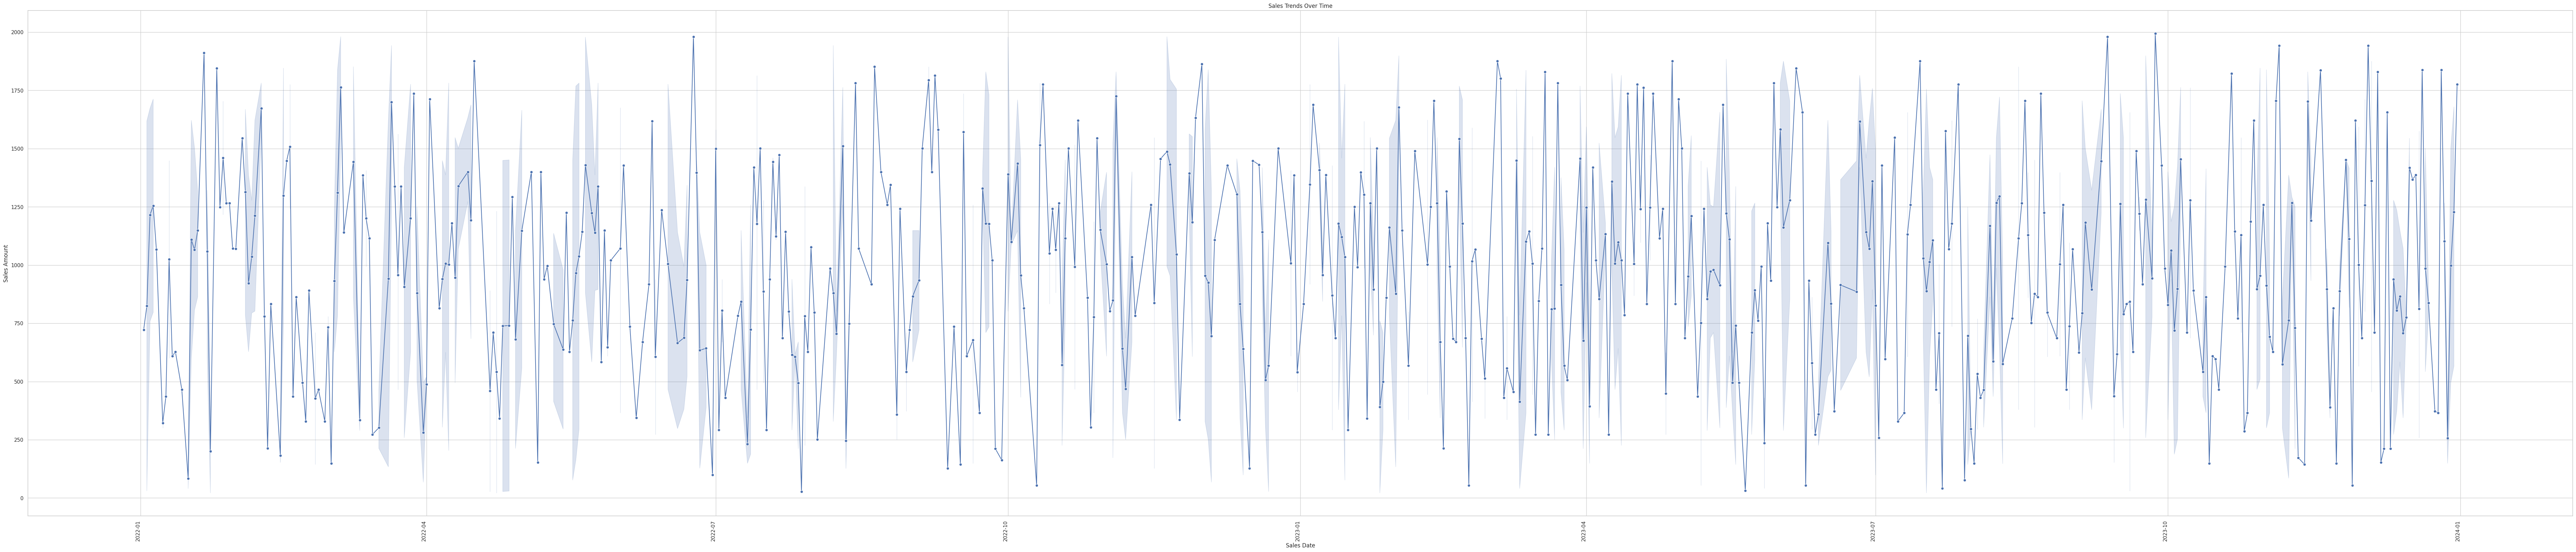

In [30]:
# Sales trends over time without outliers
plt.figure(figsize=(100, 20))
sns.lineplot(x='SalesDate', y='SalesAmount', data=df, marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Sales Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=90, ha='right')
plt.show()

In [31]:
# Calculate the count of each age value
age_distribution = df['CustomerAge'].value_counts().reset_index().rename(columns={'index': 'CustomerAge', 'CustomerAge': 'Count'})
print("Age Distribution:\n",age_distribution)

Age Distribution:
    CustomerAge  Count
0           22    505
1           35    483
2           20      1


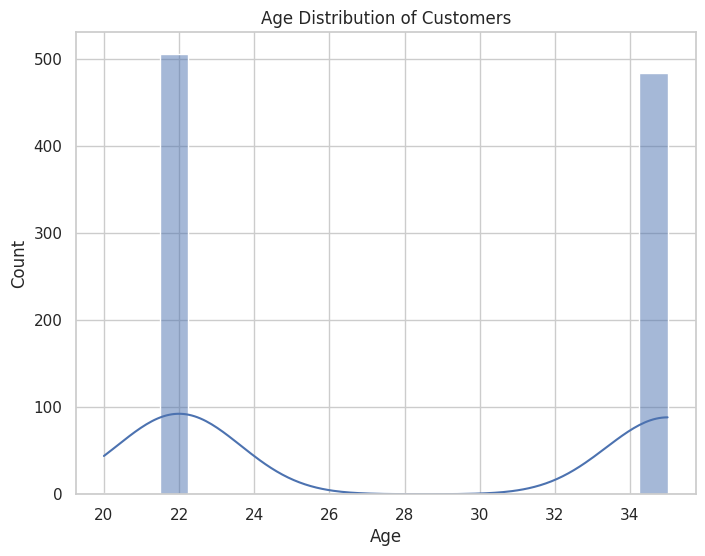

In [32]:
# Customer demographics - Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['CustomerAge'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [33]:
#Create age groups
bins = [0, 30, float('inf')]
labels = ['20s', '30s']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels, right=False)

# Display average sales per age group, rounded to 2 decimals
average_sales_per_age_group = df.groupby('AgeGroup')['SalesAmount'].mean().reset_index()
average_sales_per_age_group = average_sales_per_age_group.round(2)
print("Average Sales per Age Group:\n",average_sales_per_age_group)

Average Sales per Age Group:
   AgeGroup  SalesAmount
0      20s       974.23
1      30s       980.30


In [34]:
# Calculate average sales per product category, rounded to 2 decimals
average_sales_per_category = df.groupby('ProductCategory')['SalesAmount'].mean().reset_index()
average_sales_per_category = average_sales_per_category.round(2)
print("Average Sales per Product Category:\n", average_sales_per_category)
# Electronics Average are approximately 7 times larger than Clothing & Home Appliances

Average Sales per Product Category:
    ProductCategory  SalesAmount
0         Clothing       978.40
1      Electronics       978.49
2  Home Appliances       974.53


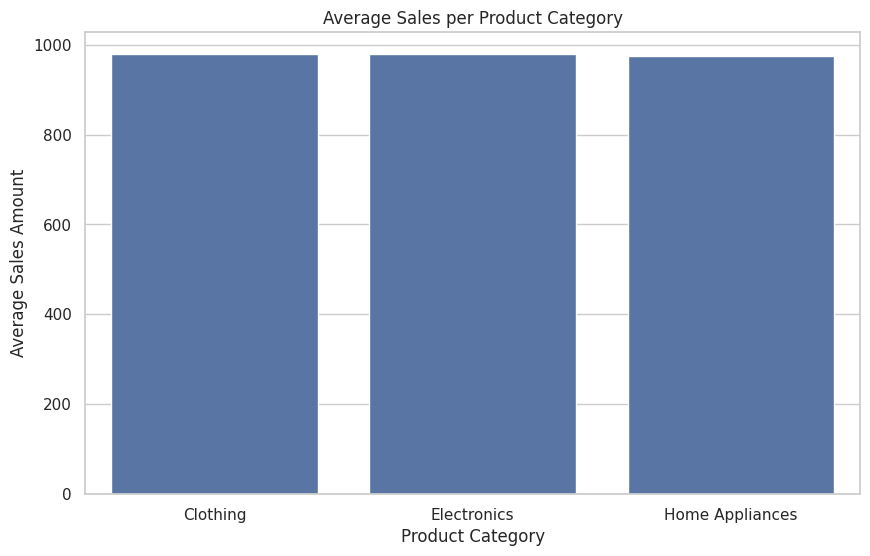

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductCategory', y='SalesAmount', data=df, ci=None, estimator=np.mean)
plt.title('Average Sales per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Sales Amount')
plt.show()

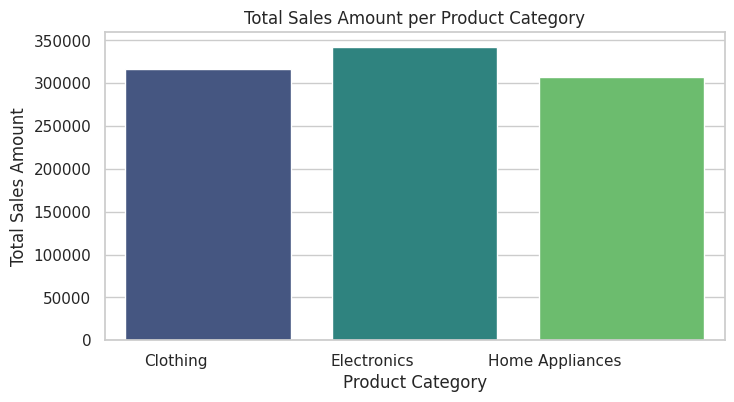

In [36]:
# Calculate total sales amount per product category
total_sales_per_category = df.groupby('ProductCategory')['SalesAmount'].sum().reset_index()

# Create a bar plot for total sales per category
plt.figure(figsize=(8, 4))
sns.barplot(x='ProductCategory', y='SalesAmount', data=total_sales_per_category, palette='viridis')
plt.title('Total Sales Amount per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=0, ha='right')
plt.show()

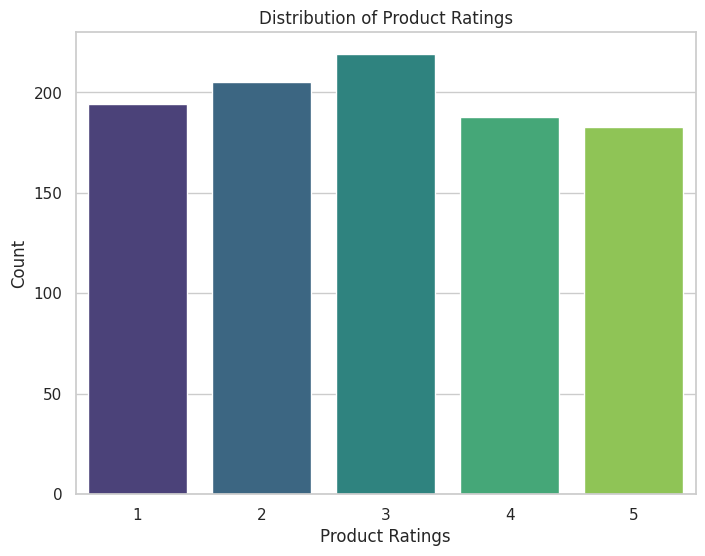

In [37]:
# Product performance - Product ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='ProductRatings', data=df, palette='viridis')
plt.title('Distribution of Product Ratings')
plt.xlabel('Product Ratings')
plt.ylabel('Count')
plt.show()

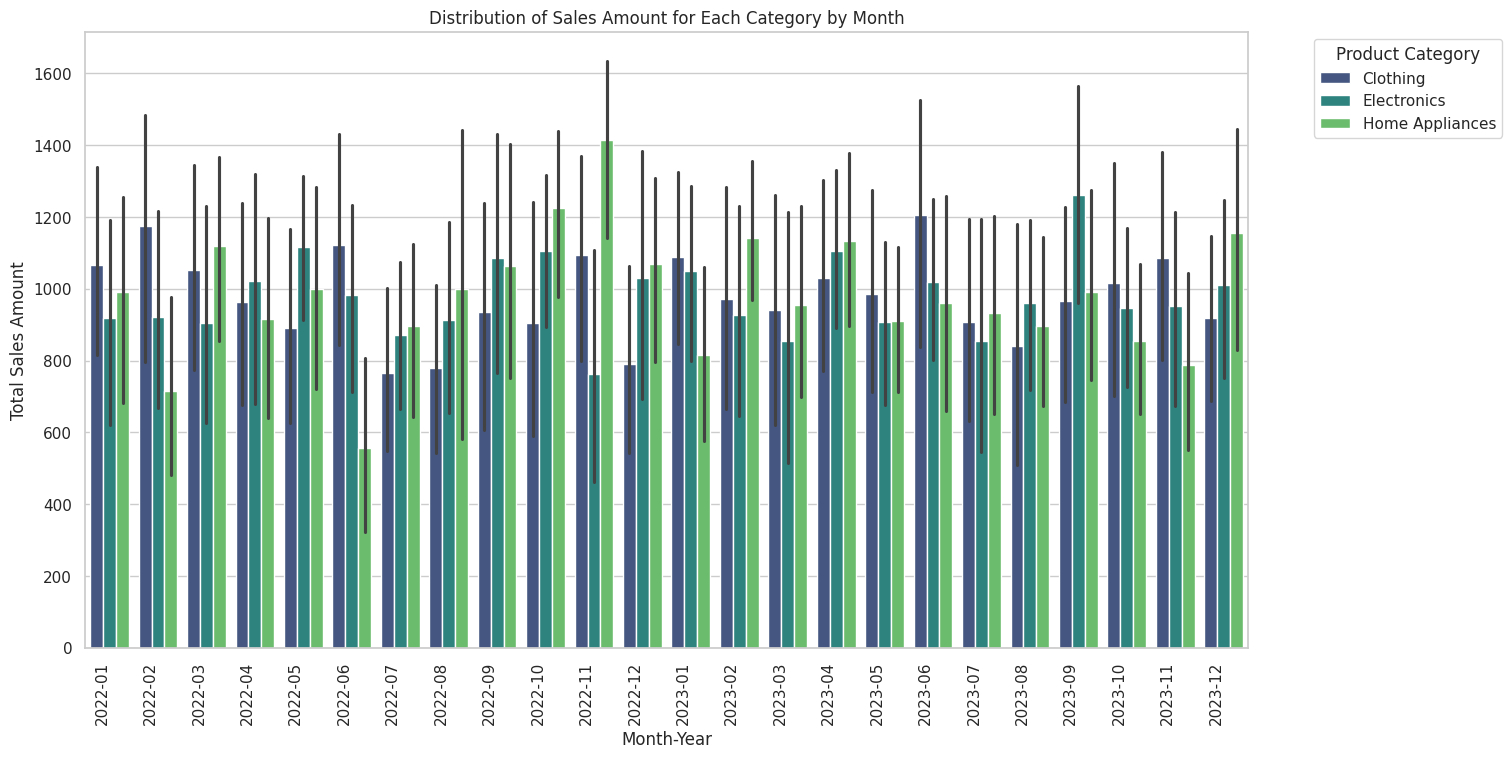

<Figure size 1500x800 with 0 Axes>

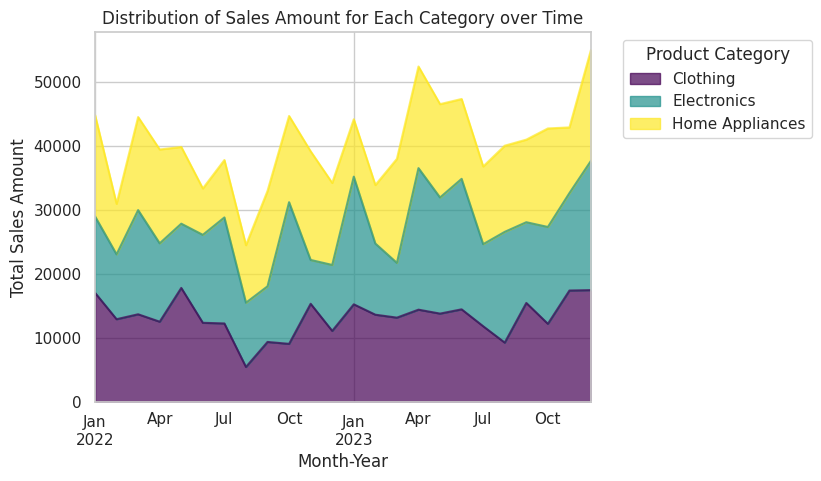

<Figure size 1500x800 with 0 Axes>

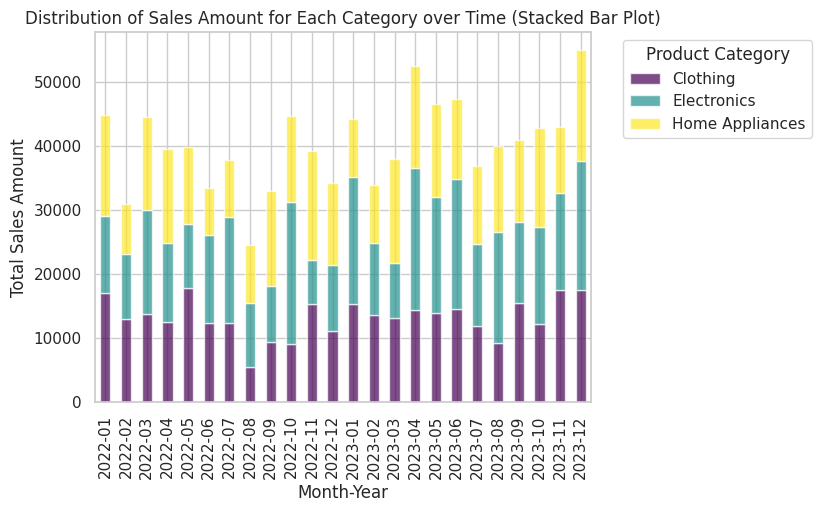

In [38]:
#Distribution of Sales Amount for Each Category by Month with 3 different plots

# Convert 'SalesDate' to datetime
df['SalesDate'] = pd.to_datetime(df['SalesDate'])
# Extract month and year from 'SalesDate'
df['MonthYear'] = df['SalesDate'].dt.to_period('M')

# Pivot the data to create a stacked area plot
pivot_df = df.pivot_table(index='MonthYear', columns='ProductCategory', values='SalesAmount', aggfunc='sum', fill_value=0)

# Create a grouped bar plot for each product category
plt.figure(figsize=(15, 8))
sns.barplot(x='MonthYear', y='SalesAmount', hue='ProductCategory', data=df, palette='viridis')
plt.title('Distribution of Sales Amount for Each Category by Month')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Create a stacked area plot
plt.figure(figsize=(15, 8))
pivot_df.plot.area(colormap='viridis', alpha=0.7)
plt.title('Distribution of Sales Amount for Each Category over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Create a stacked bar plot
plt.figure(figsize=(15, 8))
pivot_df.plot.bar(stacked=True, colormap='viridis', alpha=0.7)
plt.title('Distribution of Sales Amount for Each Category over Time (Stacked Bar Plot)')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [39]:
# Create a table with the count of products bought each month
product_count_per_month = df.groupby('MonthYear')['ProductCategory'].count().reset_index()
product_count_per_month.columns = ['Month-Year', 'Product Count']
print("Count of Products Bought Each Month")
print(product_count_per_month)

# Filter the dataframe to keep only the months where the product count is greater than the mean
product_count_per_month_filtered = product_count_per_month[product_count_per_month['Product Count'] > product_count_per_month['Product Count'].mean()]

# Display the filtered table
print("Count of Products Bought Each Month greater than mean")
print(product_count_per_month_filtered)

Count of Products Bought Each Month
   Month-Year  Product Count
0     2022-01             45
1     2022-02             33
2     2022-03             44
3     2022-04             41
4     2022-05             41
5     2022-06             38
6     2022-07             45
7     2022-08             27
8     2022-09             32
9     2022-10             41
10    2022-11             35
11    2022-12             36
12    2023-01             44
13    2023-02             34
14    2023-03             41
15    2023-04             48
16    2023-05             50
17    2023-06             45
18    2023-07             41
19    2023-08             44
20    2023-09             39
21    2023-10             46
22    2023-11             45
23    2023-12             54
Count of Products Bought Each Month greater than mean
   Month-Year  Product Count
0     2022-01             45
2     2022-03             44
6     2022-07             45
12    2023-01             44
15    2023-04             48
16    2023-

In [40]:
# Pivot the dataframe to count the number of products bought each month for each product category
product_count_per_month_category = df.pivot_table(index='MonthYear', columns='ProductCategory', aggfunc='size', fill_value=0)

# Reset index to make MonthYear a column
product_count_per_month_category = product_count_per_month_category.reset_index()

# Rename the columns for better clarity
product_count_per_month_category.columns.name = None  # Remove the columns name
product_count_per_month_category.columns = ['Month-Year'] + [str(col) for col in product_count_per_month_category.columns[1:]]

# Display the table
print("Table: Count of Products Bought Each Month for Each Product Category")
print(product_count_per_month_category)


Table: Count of Products Bought Each Month for Each Product Category
   Month-Year  Clothing  Electronics  Home Appliances
0     2022-01        16           13               16
1     2022-02        11           11               11
2     2022-03        13           18               13
3     2022-04        13           12               16
4     2022-05        20            9               12
5     2022-06        11           14               13
6     2022-07        16           19               10
7     2022-08         7           11                9
8     2022-09        10            8               14
9     2022-10        10           20               11
10    2022-11        14            9               12
11    2022-12        14           10               12
12    2023-01        14           19               11
13    2023-02        14           12                8
14    2023-03        14           10               17
15    2023-04        14           20               14
16    2023-05

In [41]:
# Calculate total sales for each month
total_sales_per_month = df.groupby('MonthYear')['SalesAmount'].sum().reset_index()

# Display the table
print("Table: Total Sales Amount for Each Month")
print(total_sales_per_month)

# Filter the dataframe to keep only the months where the product count is greater than the mean
total_sales_per_month_filtered = total_sales_per_month[total_sales_per_month['SalesAmount'] > total_sales_per_month['SalesAmount'].mean()]

# Display the filtered table
print("Total Sales Amount for Each Month greater than mean")
print(total_sales_per_month_filtered)

Table: Total Sales Amount for Each Month
   MonthYear  SalesAmount
0    2022-01        44830
1    2022-02        30928
2    2022-03        44490
3    2022-04        39421
4    2022-05        39819
5    2022-06        33327
6    2022-07        37774
7    2022-08        24476
8    2022-09        32946
9    2022-10        44653
10   2022-11        39131
11   2022-12        34195
12   2023-01        44137
13   2023-02        33864
14   2023-03        37958
15   2023-04        52381
16   2023-05        46505
17   2023-06        47308
18   2023-07        36770
19   2023-08        40014
20   2023-09        40959
21   2023-10        42706
22   2023-11        42871
23   2023-12        54984
Total Sales Amount for Each Month greater than mean
   MonthYear  SalesAmount
0    2022-01        44830
2    2022-03        44490
9    2022-10        44653
12   2023-01        44137
15   2023-04        52381
16   2023-05        46505
17   2023-06        47308
20   2023-09        40959
21   2023-10        427

In [42]:
# Pivot the dataframe to calculate the sum of sales amount for each product category per month
sales_amount_per_month_category = df.pivot_table(index='MonthYear', columns='ProductCategory', values='SalesAmount', aggfunc='sum', fill_value=0)

# Reset index to make MonthYear a column
sales_amount_per_month_category = sales_amount_per_month_category.reset_index()

# Rename the columns for better clarity
sales_amount_per_month_category.columns.name = None  # Remove the columns name
sales_amount_per_month_category.columns = ['Month-Year'] + [str(col) for col in sales_amount_per_month_category.columns[1:]]

# Display the table
print("Table: Sales Amount for Each Product Category Per Month")
print(sales_amount_per_month_category)


Table: Sales Amount for Each Product Category Per Month
   Month-Year  Clothing  Electronics  Home Appliances
0     2022-01     17040        11942            15848
1     2022-02     12909        10139             7880
2     2022-03     13680        16272            14538
3     2022-04     12520        12244            14657
4     2022-05     17796        10035            11988
5     2022-06     12349        13739             7239
6     2022-07     12248        16557             8969
7     2022-08      5451        10038             8987
8     2022-09      9358         8689            14899
9     2022-10      9059        22130            13464
10    2022-11     15317         6851            16963
11    2022-12     11083        10301            12811
12    2023-01     15235        19944             8958
13    2023-02     13614        11116             9134
14    2023-03     13155         8553            16250
15    2023-04     14400        22110            15871
16    2023-05     13786   

<Figure size 1200x600 with 0 Axes>

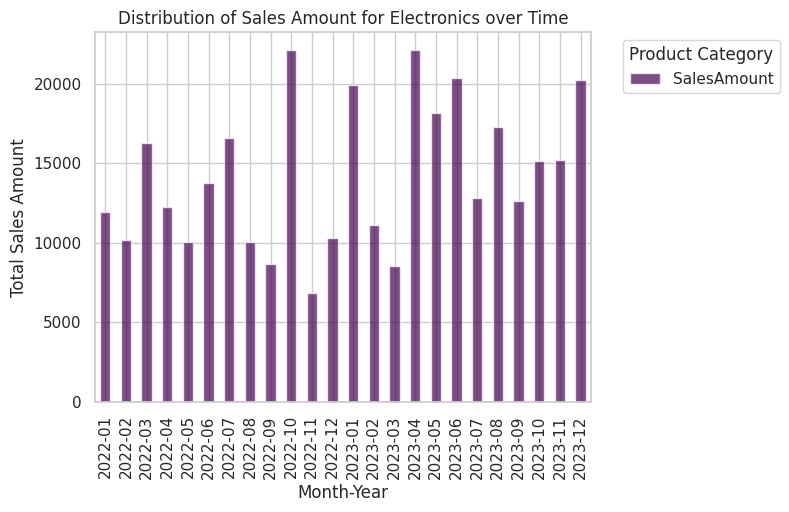

<Figure size 1200x600 with 0 Axes>

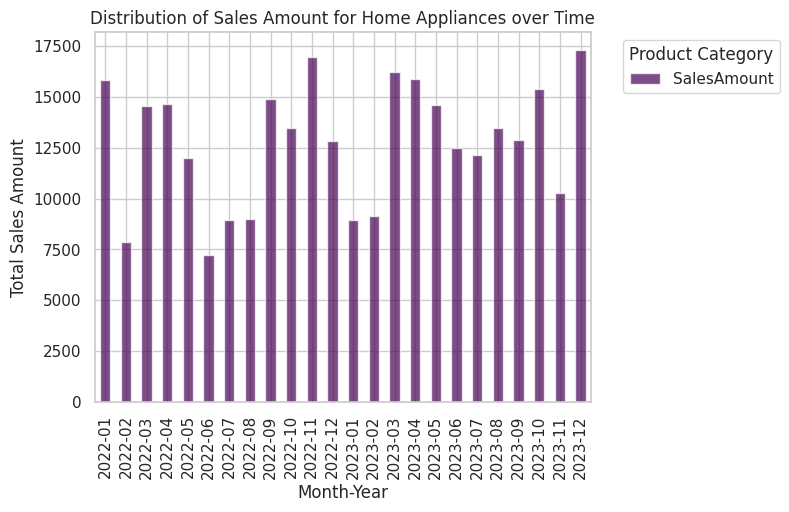

<Figure size 1200x600 with 0 Axes>

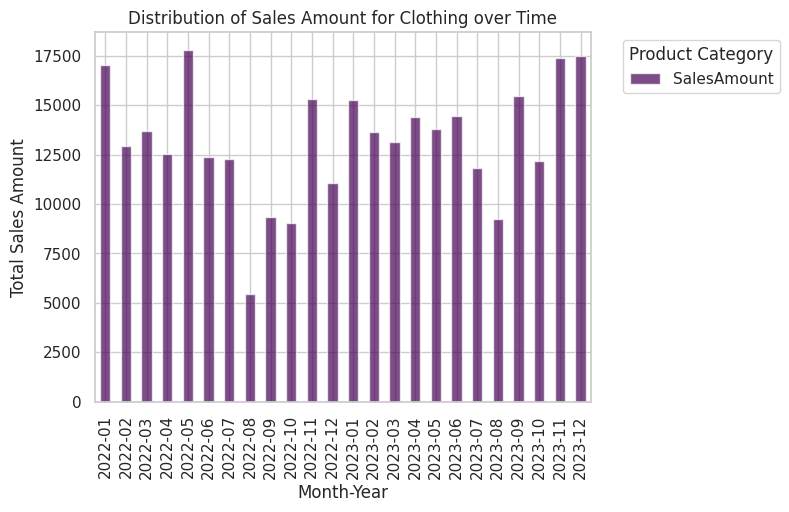

In [43]:
##Distribution of Sales Amount for Each Category by Month | Plotting by separate Categories
# Convert 'SalesDate' to datetime
df['SalesDate'] = pd.to_datetime(df['SalesDate'])

# Extract month and year from 'SalesDate'
df['MonthYear'] = df['SalesDate'].dt.to_period('M')

# Get unique product categories
categories = df['ProductCategory'].unique()

# Create a stacked bar plot for each product category
for category in categories:
    # Filter data for the current category
    category_df = df[df['ProductCategory'] == category]

    # Pivot the data to create a stacked bar plot
    pivot_df = category_df.pivot_table(index='MonthYear', values='SalesAmount', aggfunc='sum', fill_value=0)

    # Create a stacked bar plot
    plt.figure(figsize=(12, 6))
    pivot_df.plot.bar(stacked=True, colormap='viridis', alpha=0.7)
    plt.title(f'Distribution of Sales Amount for {category} over Time')
    plt.xlabel('Month-Year')
    plt.ylabel('Total Sales Amount')
    plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

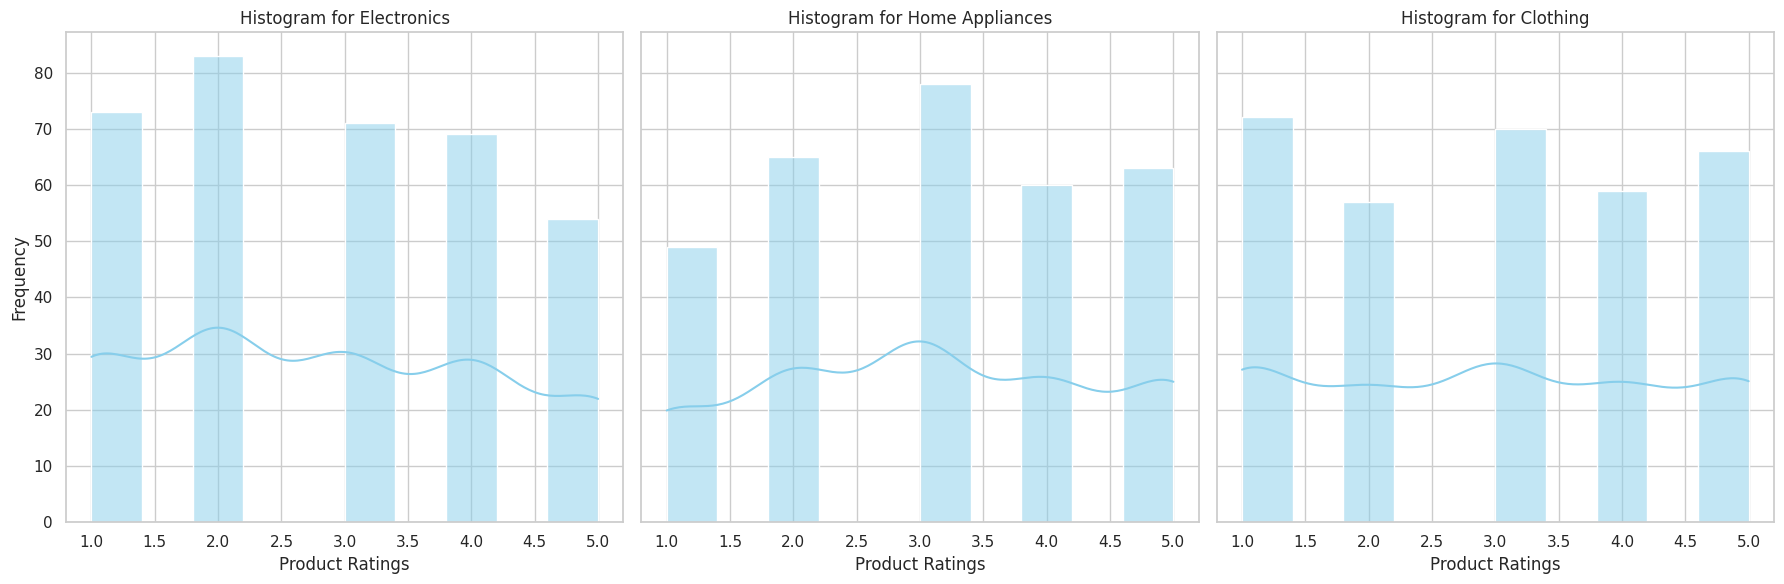

In [44]:
# Create subplots for each product category for ratings
categories = df['ProductCategory'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(categories), figsize=(18, 6), sharey=True)

# Iterate through categories and plot histograms
for i, category in enumerate(categories):
    subset_df = df[df['ProductCategory'] == category]
    sns.histplot(subset_df['ProductRatings'], bins=10, ax=axes[i], color='skyblue', kde=True)
    axes[i].set_title(f'Histogram for {category}')
    axes[i].set_xlabel('Product Ratings')
    if i == 0:
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Hypothesis Testings

In [45]:
# Test if average sales differ significantly between months

# Extract month from the SalesDate column
df['Month'] = df['SalesDate'].dt.month

# Perform one-way ANOVA
anova_results = f_oneway(*[df[df['Month'] == month]['SalesAmount'] for month in range(1, 13)])

# Print ANOVA results
print("One-way ANOVA results:")
print("F-statistic:", anova_results.statistic)
print("p-value:", anova_results.pvalue)

# Determine significance
alpha = 0.05
if anova_results.pvalue < alpha:
    print("There is a significant difference in average sales between months.")
else:
    print("There is no significant difference in average sales between months.")

from scipy.stats import kruskal

# Perform Kruskal-Wallis test
kruskal_results = kruskal(*[df[df['Month'] == month]['SalesAmount'] for month in range(1, 13)])

# Print Kruskal-Wallis test results
print("Kruskal-Wallis test results:")
print("H-statistic:", kruskal_results.statistic)
print("p-value:", kruskal_results.pvalue)

# Determine significance
alpha = 0.05
if kruskal_results.pvalue < alpha:
    print("The average sales significantly differ between months.")
else:
    print("There is no significant difference in average sales between months.")

One-way ANOVA results:
F-statistic: 0.7219332582782364
p-value: 0.7181747353564083
There is no significant difference in average sales between months.
Kruskal-Wallis test results:
H-statistic: 7.93361588165882
p-value: 0.719237813083681
There is no significant difference in average sales between months.


In [46]:
# Tests

# List of columns to test
columns_to_test = ['ProductCategory', 'CustomerLocation', 'CustomerGender', 'CustomerAge', 'ProductRatings']

for column in columns_to_test:
    # Perform one-way ANOVA
    anova_results = f_oneway(*[df[df[column] == group]['SalesAmount'] for group in df[column].unique()])

    # Print ANOVA results
    print(f"One-way ANOVA results for column '{column}':")
    print("F-statistic:", anova_results.statistic)
    print("p-value:", anova_results.pvalue)

    # Determine significance
    alpha = 0.05
    if anova_results.pvalue < alpha:
        print(f"There is a significant difference in average sales between {column} groups.")
    else:
        print(f"There is no significant difference in average sales between {column} groups.")

    print()

    # Perform Kruskal-Wallis test
    kruskal_results = kruskal(*[df[df[column] == group]['SalesAmount'] for group in df[column].unique()])

    # Print Kruskal-Wallis test results
    print(f"Kruskal-Wallis test results for column '{column}':")
    print("H-statistic:", kruskal_results.statistic)
    print("p-value:", kruskal_results.pvalue)

    # Determine significance
    alpha = 0.05
    if kruskal_results.pvalue < alpha:
        print(f"The average sales significantly differ between {column} groups.")
    else:
        print(f"There is no significant difference in average sales between {column} groups.")

    print()


One-way ANOVA results for column 'ProductCategory':
F-statistic: 0.0056024564692538775
p-value: 0.9944132396782334
There is no significant difference in average sales between ProductCategory groups.

Kruskal-Wallis test results for column 'ProductCategory':
H-statistic: 0.02248955671075157
p-value: 0.9888182078550322
There is no significant difference in average sales between ProductCategory groups.

One-way ANOVA results for column 'CustomerLocation':
F-statistic: 2.5075884796973975
p-value: 0.028797924547020327
There is a significant difference in average sales between CustomerLocation groups.

Kruskal-Wallis test results for column 'CustomerLocation':
H-statistic: 12.678848796465873
p-value: 0.026581555427246828
The average sales significantly differ between CustomerLocation groups.

One-way ANOVA results for column 'CustomerGender':
F-statistic: 1.0453642259672589
p-value: 0.3716146347608147
There is no significant difference in average sales between CustomerGender groups.

Kruskal

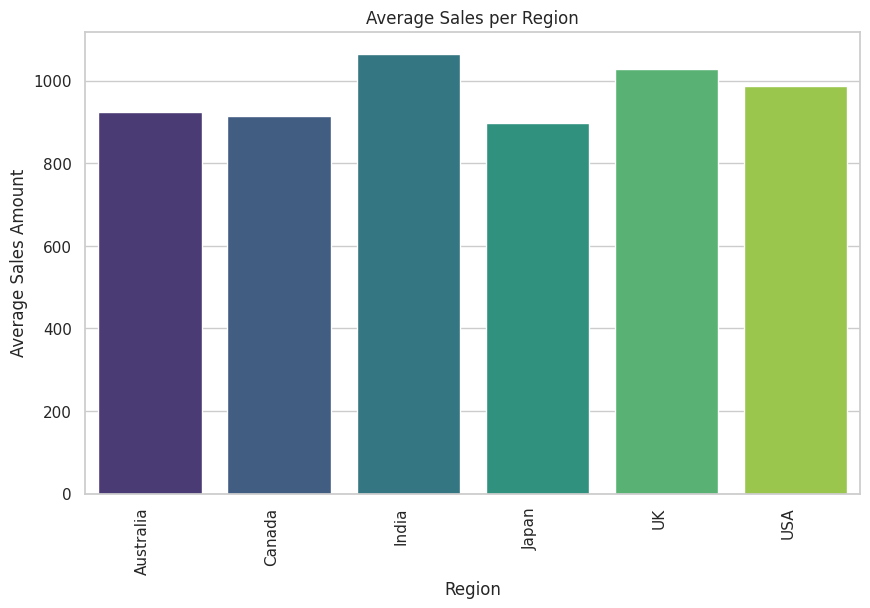

Average Sales per Region:
  CustomerLocation  SalesAmount
0        Australia       924.04
1           Canada       913.41
2            India      1065.48
3            Japan       897.71
4               UK      1029.36
5              USA       986.12


In [47]:
# Calculate average sales per region
average_sales_per_region = df.groupby('CustomerLocation')['SalesAmount'].mean().reset_index()

# Create a bar plot for average sales per region
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerLocation', y='SalesAmount', data=average_sales_per_region, palette='viridis')
plt.title('Average Sales per Region')
plt.xlabel('Region')
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=90, ha='right')
plt.show()

# Display the table for average sales per region
print("Average Sales per Region:")
print(average_sales_per_region)


# Predictive Models


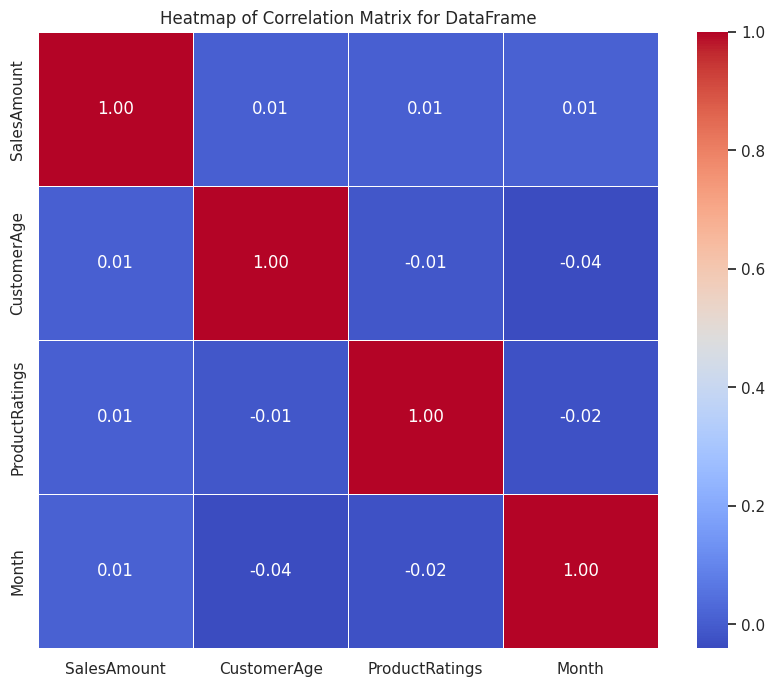

In [48]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix for DataFrame')
plt.show()


In [49]:
# List of columns to be label encoded
columns_to_encode = ['CustomerGender', 'CustomerLocation', 'ProductCategory']

# get_dummies
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=False)

# Instantiate LabelEncoder
encoder = LabelEncoder()

# Loop label encoding
for column in columns_to_encode:
    df[column + '_encoded'] = encoder.fit_transform(df[column])

In [50]:
df.CustomerLocation.value_counts()

USA          208
UK           200
Canada       197
India        166
Australia    112
Japan        106
Name: CustomerLocation, dtype: int64

In [51]:
df.CustomerLocation_encoded.value_counts()

5    208
4    200
1    197
2    166
0    112
3    106
Name: CustomerLocation_encoded, dtype: int64

In [52]:
location_mapping = {
    'USA': 5,
    'UK': 4,
    'Canada': 1,
    'India': 2,
    'Australia': 0,
    'Japan': 3
}

# Map the customer location column using the mapping dictionary
df['CustomerLocation_encoded'] = df['CustomerLocation'].map(location_mapping)

# Print the first few rows to verify the mapping
print(df[['CustomerLocation', 'CustomerLocation_encoded']].head())

    CustomerLocation CustomerLocation_encoded
103            India                        2
630              USA                        5
150               UK                        4
847        Australia                        0
704              USA                        5


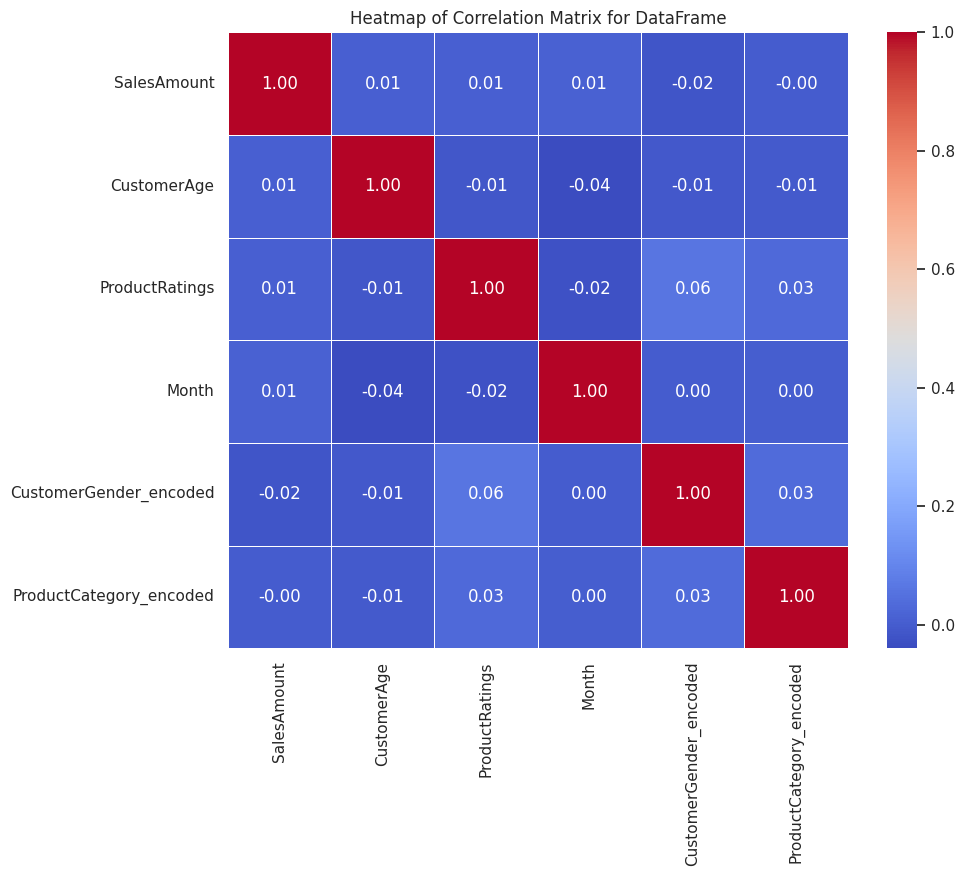

In [53]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix for DataFrame')
plt.show()

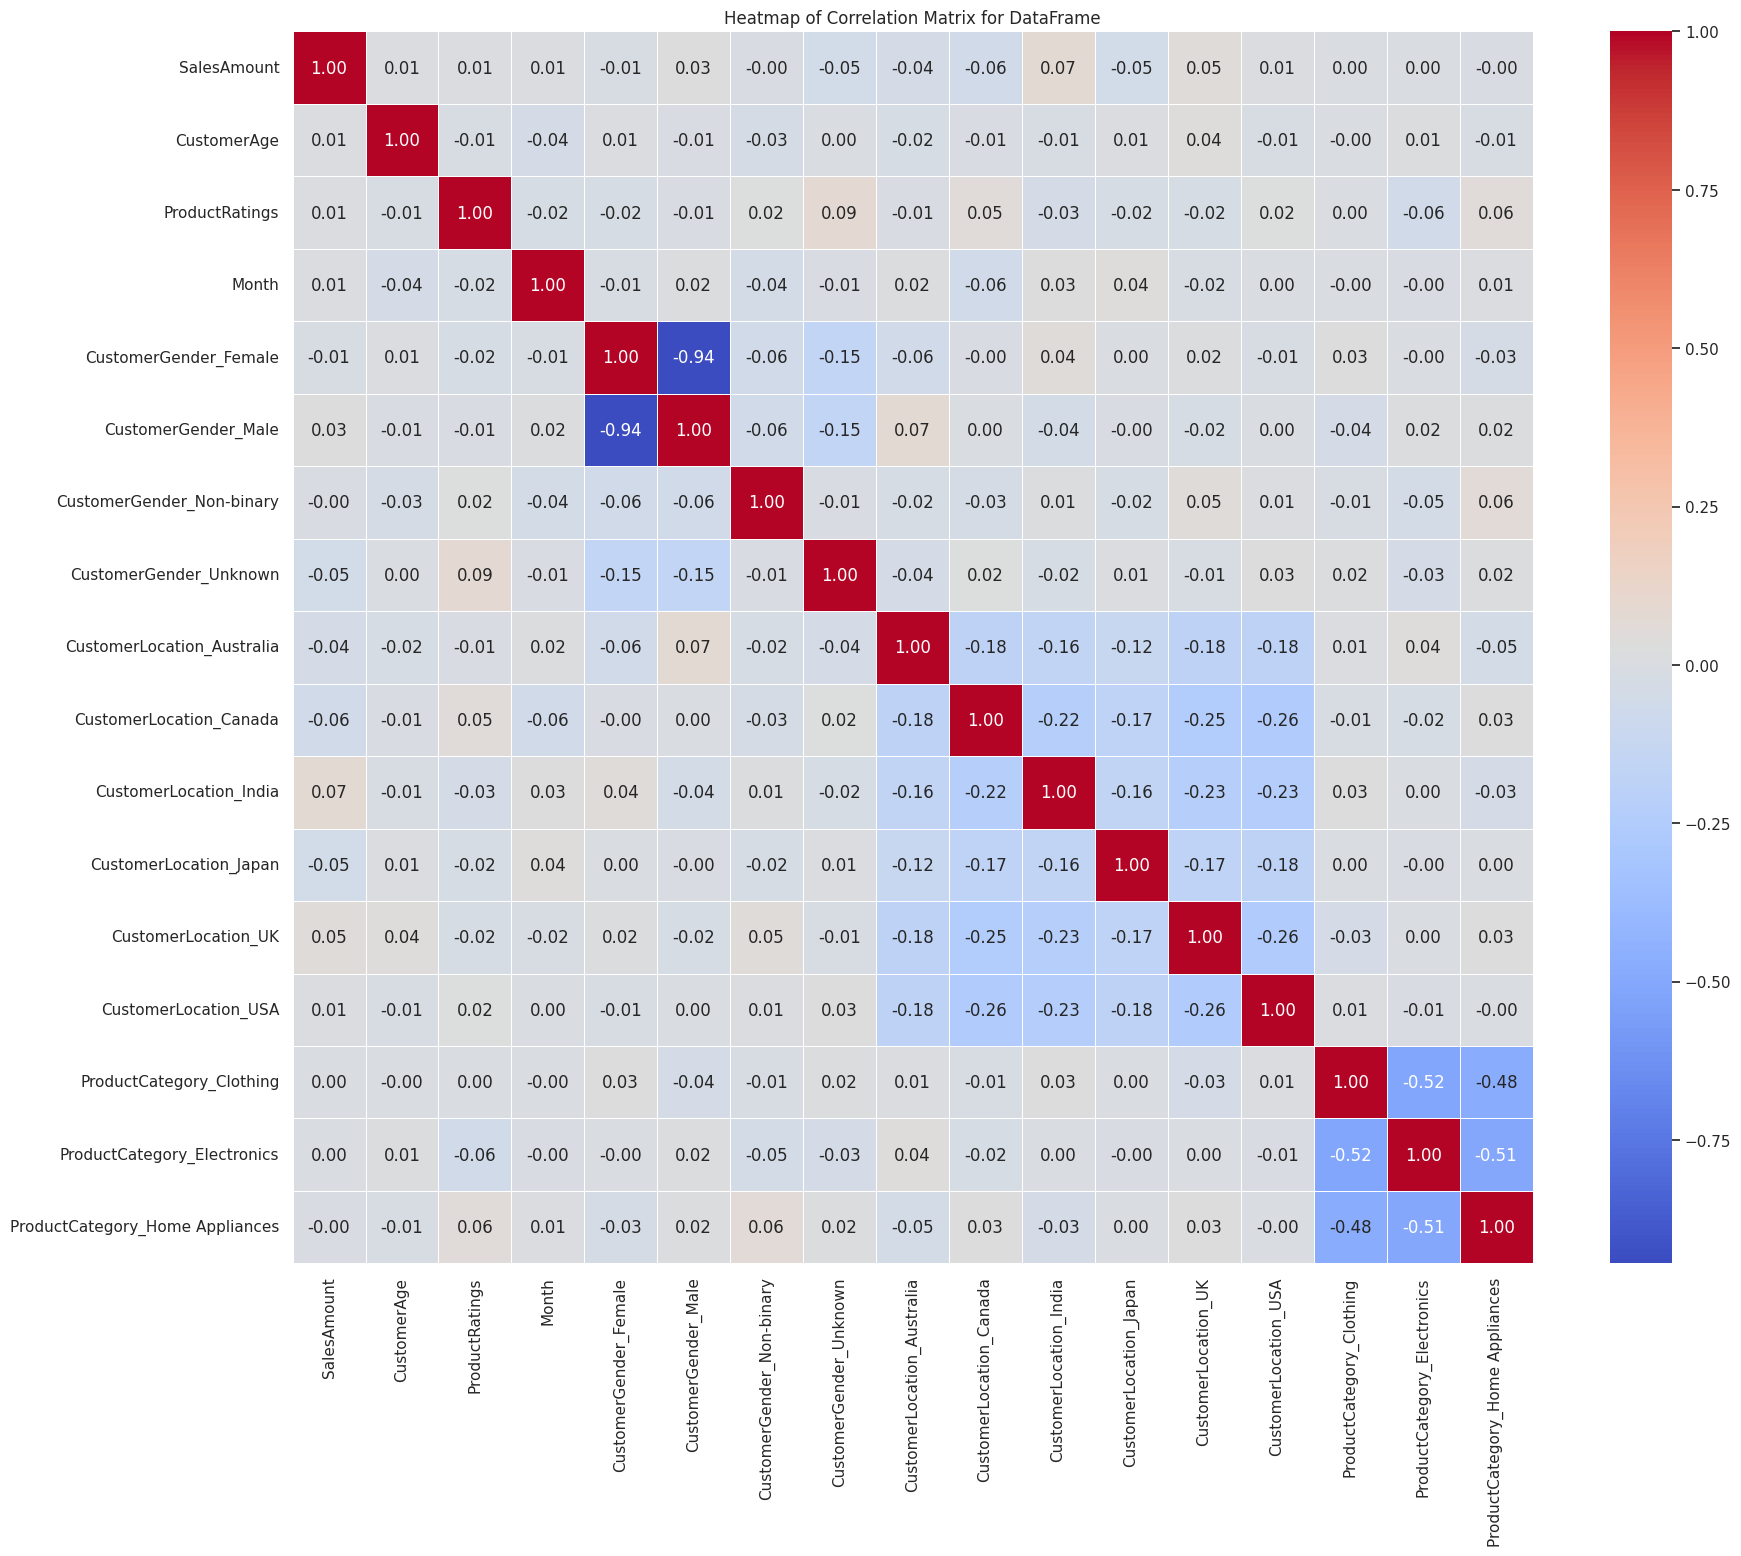

In [54]:
# Create the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix for DataFrame')
plt.show()

In [55]:
# Feature selection
features = ['ProductCategory_encoded', 'CustomerAge', 'CustomerGender_encoded', 'CustomerLocation_encoded', 'ProductRatings']
target = 'SalesAmount'

# Iterate over each feature
for feature in features:
    print(f"Feature: {feature}")

    # Separate the current feature and target variable
    X = df[[feature]]
    y = df[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("R-squared:", r_squared)
    print()


Feature: ProductCategory_encoded
Mean Squared Error: 292048.7779756151
R-squared: -0.003919459381162227

Feature: CustomerAge
Mean Squared Error: 291834.4058554063
R-squared: -0.003182553907637553

Feature: CustomerGender_encoded
Mean Squared Error: 291671.4819556473
R-squared: -0.0026225020063759263

Feature: CustomerLocation_encoded
Mean Squared Error: 291014.55162712437
R-squared: -0.0003642999867226049

Feature: ProductRatings
Mean Squared Error: 291902.07620086893
R-squared: -0.003415171133786865



Feature: ProductCategory_encoded
Mean Squared Error: 292048.7779756151


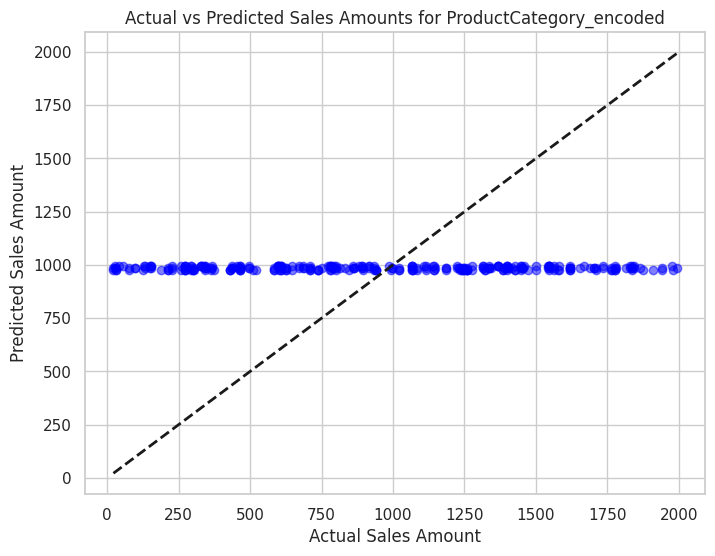


Feature: CustomerAge
Mean Squared Error: 291834.4058554063


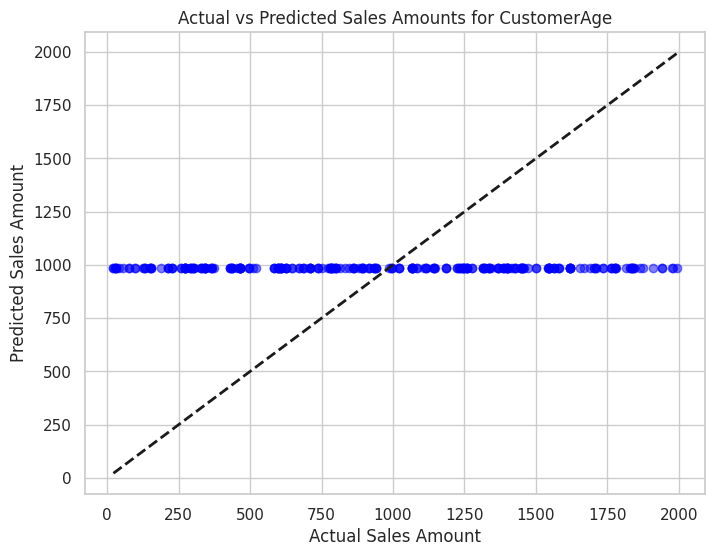


Feature: CustomerGender_encoded
Mean Squared Error: 291671.4819556473


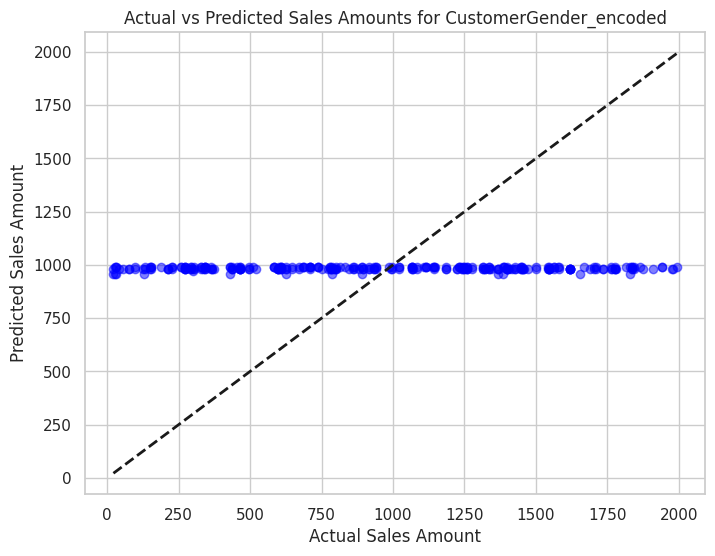


Feature: CustomerLocation_encoded
Mean Squared Error: 291014.55162712437


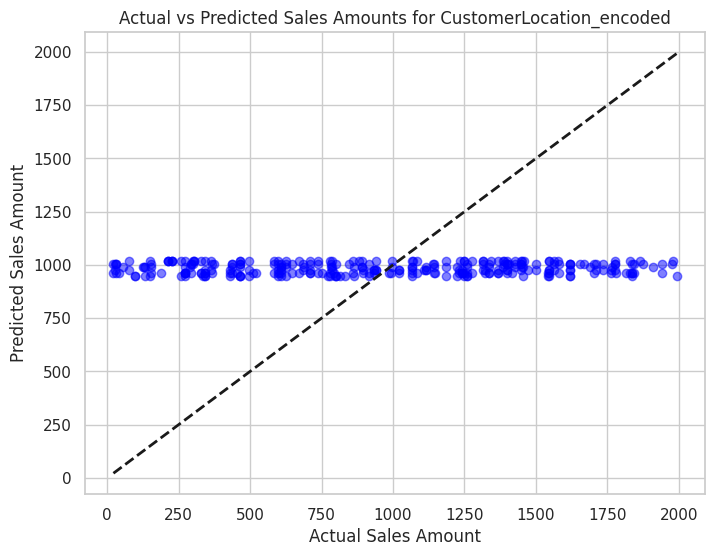


Feature: ProductRatings
Mean Squared Error: 291902.07620086893


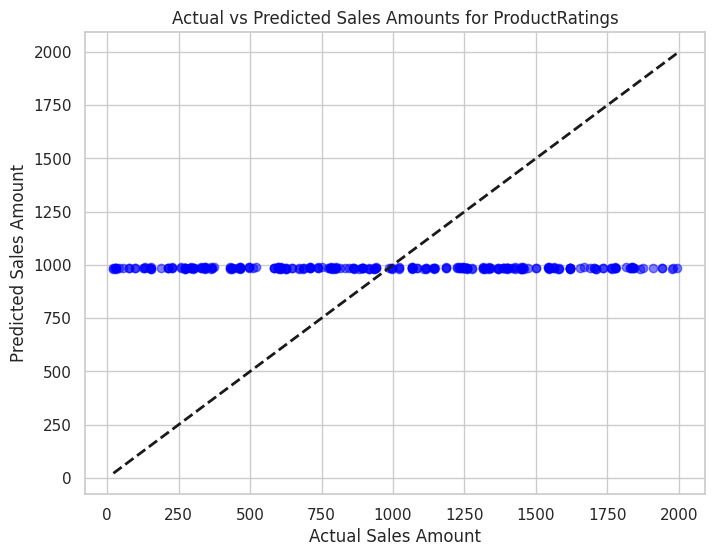

In [56]:
# Feature selection
features = ['ProductCategory_encoded', 'CustomerAge', 'CustomerGender_encoded', 'CustomerLocation_encoded', 'ProductRatings']
target = 'SalesAmount'

# Iterate over each feature
for feature in features:
    print(f"Feature: {feature}")

    # Separate the current feature and target variable
    X = df[[feature]]
    y = df[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # Plot actual vs predicted sales amounts
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f'Actual vs Predicted Sales Amounts for {feature}')
    plt.xlabel('Actual Sales Amount')
    plt.ylabel('Predicted Sales Amount')
    plt.show()

    print()


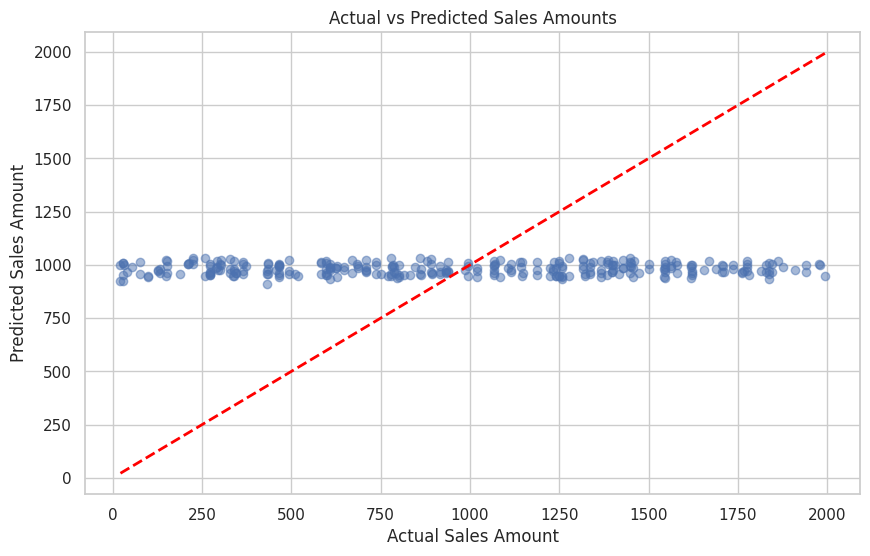

Mean Squared Error: 291141.22045834357
R-squared: -0.00079972486827673
Coefficients:
ProductCategory_encoded: -8.379964633090628
CustomerAge: -0.20283148319814792
CustomerGender_encoded: -10.55349594970362
CustomerLocation_encoded: 13.944788265612374
ProductRatings: -1.2208577302984207
Intercept: 970.7175458149605


In [57]:
# Feature selection
features = ['ProductCategory_encoded', 'CustomerAge',	'CustomerGender_encoded',	'CustomerLocation_encoded', 'ProductRatings']
target = 'SalesAmount'

# Separate features and target variable
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Visualize the predictions against actual sales amounts
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Sales Amounts')
plt.xlabel('Actual Sales Amount')
plt.ylabel('Predicted Sales Amount')
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print the coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef}")
print("Intercept:", intercept)

In [58]:
df_encoded.columns

Index(['SalesDate', 'SalesAmount', 'CustomerAge', 'ProductRatings', 'AgeGroup',
       'MonthYear', 'Month', 'CustomerGender_Female', 'CustomerGender_Male',
       'CustomerGender_Non-binary', 'CustomerGender_Unknown',
       'CustomerLocation_Australia', 'CustomerLocation_Canada',
       'CustomerLocation_India', 'CustomerLocation_Japan',
       'CustomerLocation_UK', 'CustomerLocation_USA',
       'ProductCategory_Clothing', 'ProductCategory_Electronics',
       'ProductCategory_Home Appliances'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:            SalesAmount   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5916
Date:                Wed, 14 Feb 2024   Prob (F-statistic):              0.669
Time:                        12:05:14   Log-Likelihood:                -7625.9
No. Observations:                 989   AIC:                         1.526e+04
Df Residuals:                     984   BIC:                         1.529e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

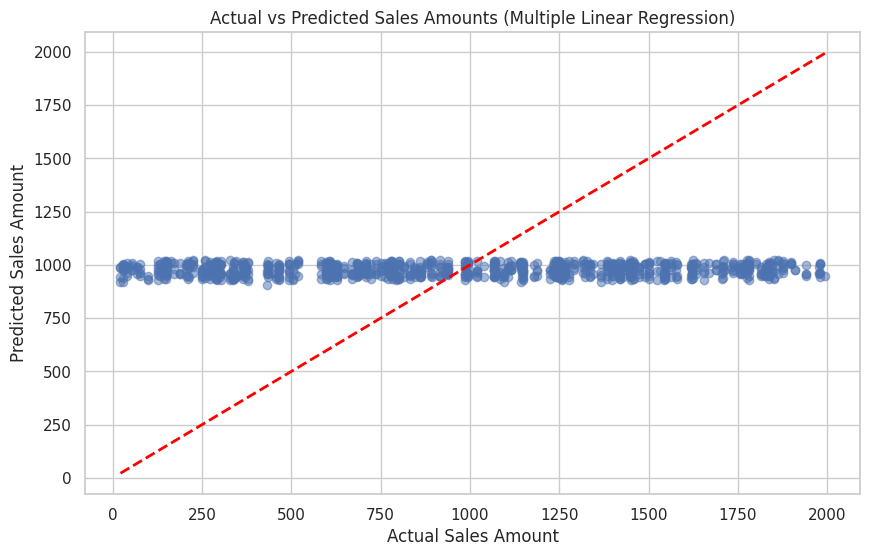

In [59]:

# Assuming df contains relevant columns such as 'ProductCategory', 'CustomerDemographics', 'ProductRatings', 'SalesAmount'

# Feature selection
features = ['ProductCategory_encoded', 'CustomerAge',	'CustomerGender_encoded',	'CustomerLocation_encoded']

# One-hot encode categorical variables
df_encoded# = pd.get_dummies(df[features], columns=['ProductCategory_encoded', 'CustomerAge',	'CustomerGender_encoded',	'CustomerLocation_encoded'], drop_first=True)

# Add a constant term to the features matrix
X = sm.add_constant(df[features])

# Target variable
y = df['SalesAmount']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the regression summary
print(model.summary())

import matplotlib.pyplot as plt

# Get predicted values
y_pred = model.predict(X)

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Sales Amounts (Multiple Linear Regression)')
plt.xlabel('Actual Sales Amount')
plt.ylabel('Predicted Sales Amount')
plt.show()



In [60]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target variable
X = df[['ProductCategory', 'CustomerAge', 'CustomerGender','CustomerLocation', 'ProductRatings']]
y = df['SalesAmount']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for categorical and numerical features
categorical_features = ['ProductCategory', 'CustomerGender', 'CustomerLocation']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_features = ['CustomerAge', 'ProductRatings']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and linear regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Interpret coefficients
coefficients = pipeline.named_steps['regressor'].coef_
intercept = pipeline.named_steps['regressor'].intercept_

print('Coefficients:')
for feature, coef in zip(X_train.columns, coefficients):
    print(f'{feature}: {coef}')

print(f'Intercept: {intercept}')


Mean Squared Error: 291567.7033033964
Root Mean Squared Error: 539.9700948232193
R-squared: 0.010516178376289154
Coefficients:
ProductCategory: 6.004066535463918
CustomerAge: 6.383953877646326
CustomerGender: 23.797767157973073
CustomerLocation: -24.660358043899688
ProductRatings: 0.8625908859266318
Intercept: 970.7055435589758


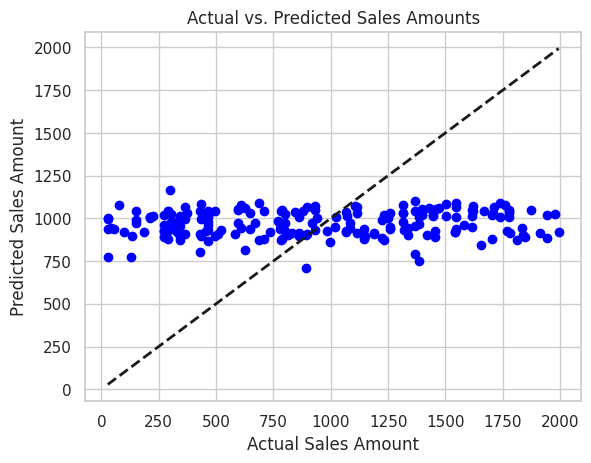

In [61]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted sales amounts
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales Amount')
plt.ylabel('Predicted Sales Amount')
plt.title('Actual vs. Predicted Sales Amounts')
plt.show()


In [62]:
df.columns

Index(['SalesDate', 'ProductCategory', 'SalesAmount', 'CustomerAge',
       'CustomerGender', 'CustomerLocation', 'ProductRatings', 'AgeGroup',
       'MonthYear', 'Month', 'CustomerGender_encoded',
       'CustomerLocation_encoded', 'ProductCategory_encoded'],
      dtype='object')

Mean Squared Error: 296380.2492918259
R-squared: -0.005816002254210861


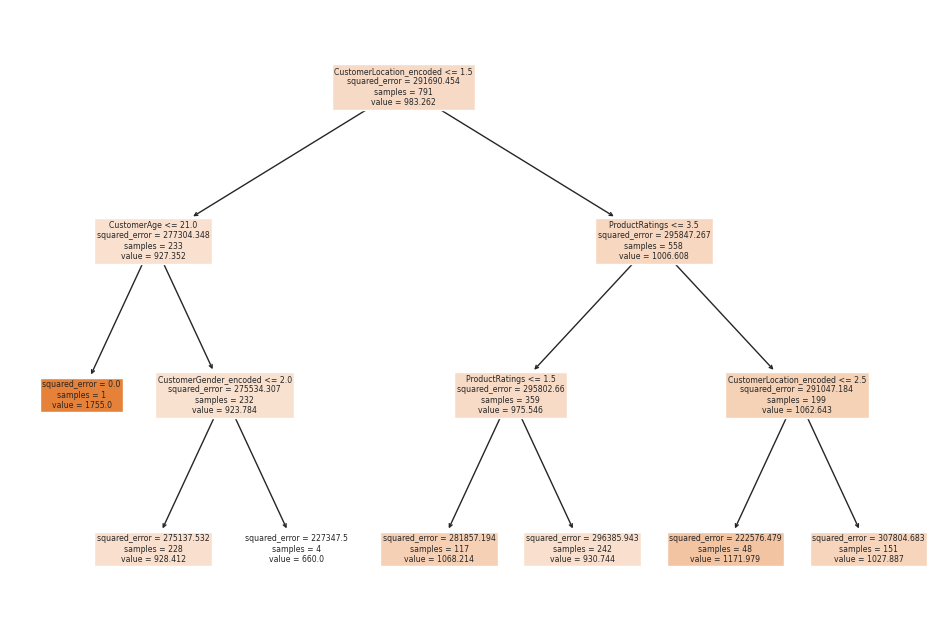

In [63]:
# Split data into features (X) and target variable (y)
X = df[['ProductCategory_encoded', 'CustomerAge',	'CustomerGender_encoded',	'CustomerLocation_encoded', 'ProductRatings']]
y = df['SalesAmount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the decision tree regressor model
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predict sales amount on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()


Mean Squared Error: 348149.8202164874
R-squared: -0.18150470954923814


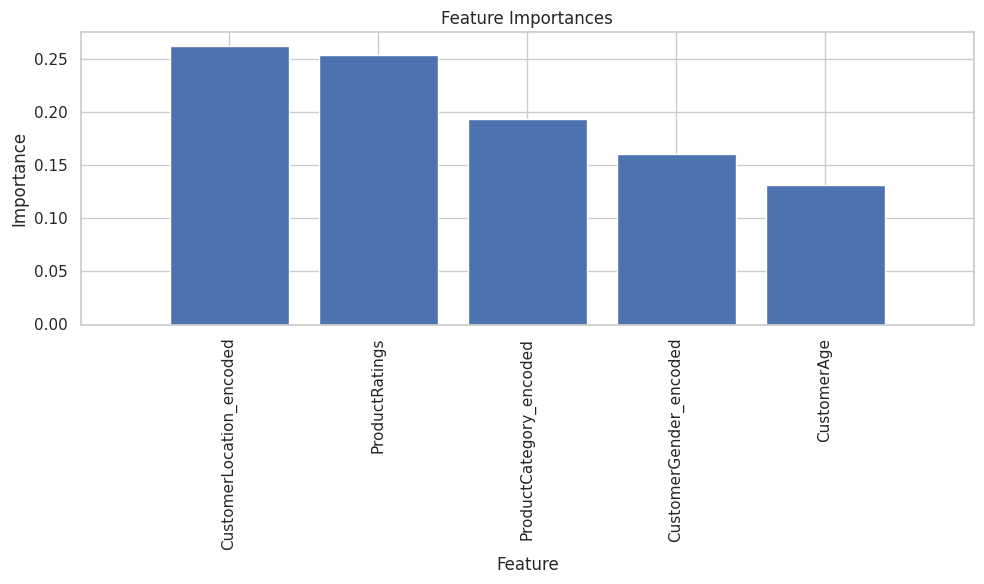

In [64]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features (X) and target variable (y)
X = df[['ProductCategory_encoded', 'CustomerAge',	'CustomerGender_encoded',	'CustomerLocation_encoded', 'ProductRatings']]
y = df['SalesAmount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict sales amount on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [65]:
# Group the dataframe by CustomerLocation_encoded and find the product category with the highest sales amount in each location
location_product_mapping = df.groupby('CustomerLocation_encoded')['ProductCategory_encoded'].agg(lambda x: x.value_counts().idxmax())

# Convert the product category encoded values to their corresponding product categories
product_category_mapping = {
    0: 'Clothing',
    1: 'Electronics',
    2: 'Home Appliances'
}

# Map the encoded product categories to their corresponding product categories
location_product_mapping = location_product_mapping.map(product_category_mapping)

# Output the results
print("Location to advertise each product category based on sales amount:")
print(location_product_mapping)


Location to advertise each product category based on sales amount:
CustomerLocation_encoded
0        Electronics
1    Home Appliances
2           Clothing
3        Electronics
4        Electronics
5        Electronics
Name: ProductCategory_encoded, dtype: object


In [66]:
# # Group the dataframe by CustomerLocation_encoded and ProductCategory_encoded and calculate the average rating
location_product_rating = df.groupby(['CustomerLocation_encoded', 'ProductCategory_encoded'])['ProductRatings'].mean()

# Find the location with the highest average rating for each product category
location_product_highest_rating = location_product_rating.groupby('ProductCategory_encoded').idxmax()

# Convert the encoded product categories to their corresponding product categories
product_category_mapping = {
    0: 'Clothing',
    1: 'Electronics',
    2: 'Home Appliances'
}

# Map the encoded product categories to their corresponding product categories
location_product_highest_rating = location_product_highest_rating.map(lambda x: (x[0], product_category_mapping[x[1]]))

# Output the results
print("Location with the highest average rating for each product category:")
print(location_product_highest_rating)



Location with the highest average rating for each product category:
ProductCategory_encoded
0           (1, Clothing)
1        (0, Electronics)
2    (1, Home Appliances)
Name: ProductRatings, dtype: object


In [67]:
# Group the dataframe by CustomerLocation_encoded and ProductCategory_encoded, and calculate the maximum rating
location_product_max_rating = df.groupby(['CustomerLocation_encoded', 'ProductCategory_encoded'])['ProductRatings'].max()

# Convert the encoded product categories to their corresponding product categories
product_category_mapping = {
    0: 'Clothing',
    1: 'Electronics',
    2: 'Home Appliances'
}

# Convert the encoded customer locations to their corresponding locations
# (Assuming you have a mapping of encoded locations to their names)
location_mapping = {
    0: 'Location A',
    1: 'Location B',
    # Add more mappings as needed
}

# Map the encoded product categories and customer locations to their corresponding names
location_product_max_rating = location_product_max_rating.reset_index()
location_product_max_rating['ProductCategory_encoded'] = location_product_max_rating['ProductCategory_encoded'].map(product_category_mapping)
location_product_max_rating['CustomerLocation_encoded'] = location_product_max_rating['CustomerLocation_encoded'].map(location_mapping)

# Output the results
print("Products with the highest ratings in each location:")
print(location_product_max_rating)


Products with the highest ratings in each location:
   CustomerLocation_encoded ProductCategory_encoded  ProductRatings
0                Location A                Clothing               5
1                Location A             Electronics               5
2                Location A         Home Appliances               5
3                Location B                Clothing               5
4                Location B             Electronics               5
5                Location B         Home Appliances               5
6                       NaN                Clothing               5
7                       NaN             Electronics               5
8                       NaN         Home Appliances               5
9                       NaN                Clothing               5
10                      NaN             Electronics               5
11                      NaN         Home Appliances               5
12                      NaN                Clothing             

Mean Squared Error: 360503.9100115954
R-squared: -0.2118558992642514


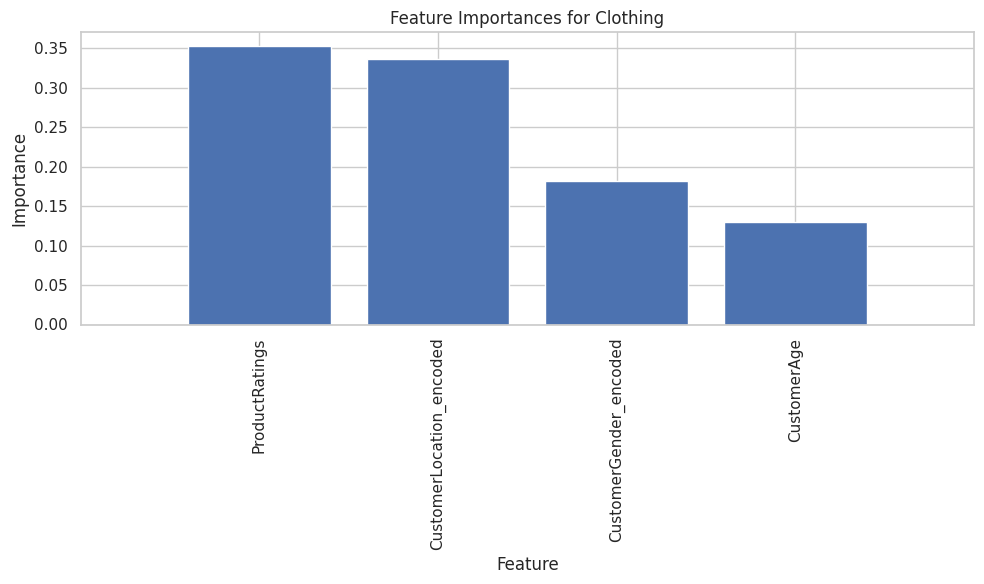

In [68]:
# Subset the dataframe where product category is "clothing"
clothing_data = df[df['ProductCategory'] == 'Clothing']

# Separate features (X) and target variable (y) for clothing subset
X = clothing_data[['CustomerAge',	'CustomerGender_encoded',	'CustomerLocation_encoded', 'ProductRatings']]
y = clothing_data['SalesAmount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict sales amount on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Clothing")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


Mean Squared Error: 359172.600326731
R-squared: -0.4333286092034332


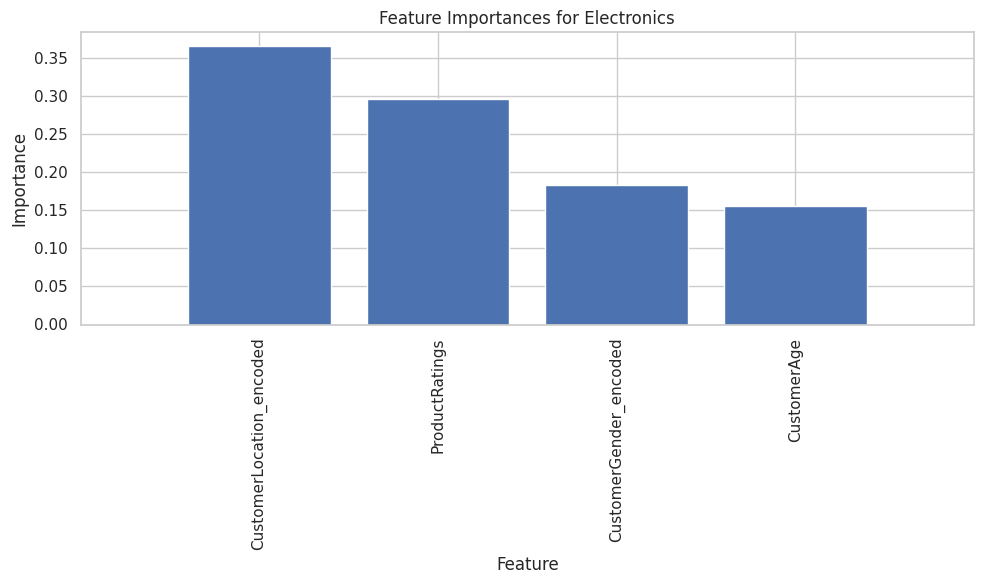

In [69]:
# Subset the dataframe where product category is "Electronics"
electronics_data = df[df['ProductCategory'] == 'Electronics']

# Separate features (X) and target variable (y) for Electronics subset
X = electronics_data[['CustomerAge',	'CustomerGender_encoded',	'CustomerLocation_encoded', 'ProductRatings']]
y = electronics_data['SalesAmount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict sales amount on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Electronics")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Mean Squared Error: 369755.66455983877
R-squared: -0.5343107565828833


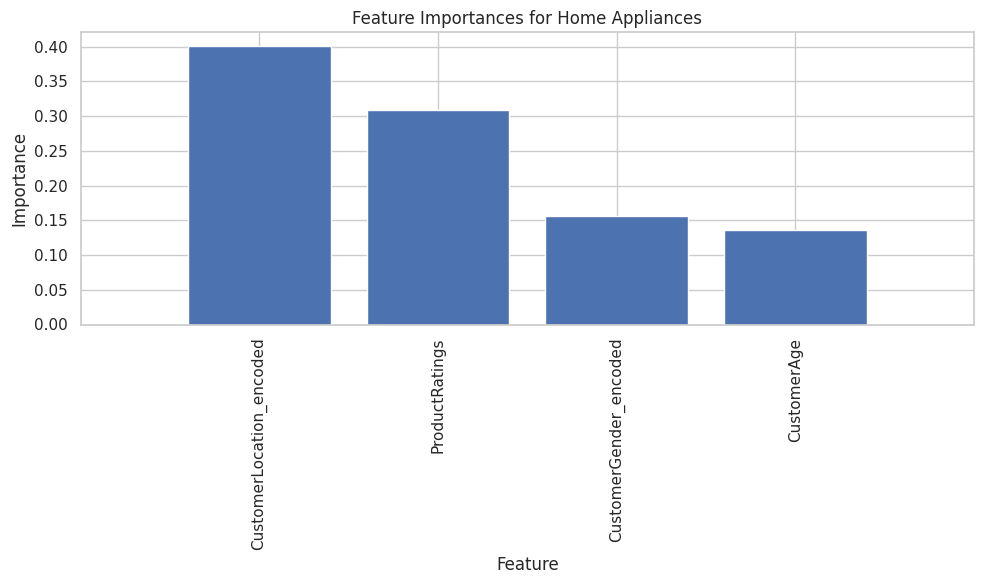

In [70]:


# Subset the dataframe where product category is "Home Appliances"
home_appliances_data = df[df['ProductCategory'] == 'Home Appliances']

# Separate features (X) and target variable (y) for Home Appliances subset
X = home_appliances_data[['CustomerAge',	'CustomerGender_encoded',	'CustomerLocation_encoded', 'ProductRatings']]
y = home_appliances_data['SalesAmount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict sales amount on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Home Appliances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [71]:
# Function to perform linear regression and plot results
def perform_linear_regression_with_plots(data, dataset_name):
    # Split data into features (X) and target variable (y)
    X = data[['ProductRatings', 'CustomerLocation_encoded']]
    y = data['SalesAmount']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Calculate mean squared error & r squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print("Results for", dataset_name)
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print()

# Perform linear regression and plot for each dataset
perform_linear_regression_with_plots(clothing_data, "Clothing Data")
perform_linear_regression_with_plots(electronics_data, "Electronics Data")
perform_linear_regression_with_plots(home_appliances_data, "Home Appliances Data")


Results for Clothing Data
Coefficients: [ 7.18083813 40.23426086]
Intercept: 869.0592573960871
Mean Squared Error: 296056.35403438134
R-squared: 0.004788494139520205

Results for Electronics Data
Coefficients: [-7.35073874 -9.97178076]
Intercept: 1010.7079758679865
Mean Squared Error: 256537.39793860834
R-squared: -0.023748447018293595

Results for Home Appliances Data
Coefficients: [20.44298859  8.50456411]
Intercept: 899.5055035856494
Mean Squared Error: 245946.77095235296
R-squared: -0.02056252922651991



In [72]:
# Grouping data by CustomerLocation_encoded and calculating total sales amount for each location
clothing_location_sales = clothing_data.groupby('CustomerLocation_encoded')['SalesAmount'].sum()
electronics_location_sales = electronics_data.groupby('CustomerLocation_encoded')['SalesAmount'].sum()
home_appliances_location_sales = home_appliances_data.groupby('CustomerLocation_encoded')['SalesAmount'].sum()

# Printing the total purchases for each location for all three datasets
print("Total purchases for each location for clothing:")
print(clothing_location_sales)
print()

print("Total purchases for each location for electronics:")
print(electronics_location_sales)
print()

print("Total purchases for each location for home appliances:")
print(home_appliances_location_sales)


Total purchases for each location for clothing:
CustomerLocation_encoded
0    29858
1    54121
2    67354
3    26493
4    66203
5    72971
Name: SalesAmount, dtype: int64

Total purchases for each location for electronics:
CustomerLocation_encoded
0    44481
1    67101
2    59513
3    34185
4    66981
5    70209
Name: SalesAmount, dtype: int64

Total purchases for each location for home appliances:
CustomerLocation_encoded
0    29153
1    58720
2    50003
3    34479
4    72688
5    61934
Name: SalesAmount, dtype: int64


In [73]:
# Grouping data by CustomerLocation_encoded and calculating total sales amount for each location
clothing_location_sales = clothing_data.groupby('CustomerLocation_encoded')['SalesAmount'].sum()
electronics_location_sales = electronics_data.groupby('CustomerLocation_encoded')['SalesAmount'].sum()
home_appliances_location_sales = home_appliances_data.groupby('CustomerLocation_encoded')['SalesAmount'].sum()

# Calculate total sales amount for each dataset
total_clothing_sales = clothing_data['SalesAmount'].sum()
total_electronics_sales = electronics_data['SalesAmount'].sum()
total_home_appliances_sales = home_appliances_data['SalesAmount'].sum()

# Calculate percentage of total purchases for each location for clothing
clothing_location_percentage = (clothing_location_sales / total_clothing_sales) * 100

# Calculate percentage of total purchases for each location for electronics
electronics_location_percentage = (electronics_location_sales / total_electronics_sales) * 100

# Calculate percentage of total purchases for each location for home appliances
home_appliances_location_percentage = (home_appliances_location_sales / total_home_appliances_sales) * 100

# Combine total purchases and percentage calculations for each location for all three datasets
clothing_location_summary = pd.concat([clothing_location_sales, clothing_location_percentage], axis=1)
clothing_location_summary.columns = ['Total Purchases', 'Percentage of Total Purchases']

electronics_location_summary = pd.concat([electronics_location_sales, electronics_location_percentage], axis=1)
electronics_location_summary.columns = ['Total Purchases', 'Percentage of Total Purchases']

home_appliances_location_summary = pd.concat([home_appliances_location_sales, home_appliances_location_percentage], axis=1)
home_appliances_location_summary.columns = ['Total Purchases', 'Percentage of Total Purchases']

# Printing the summary for each location for all three datasets
print("Clothing Location Summary:")
print(clothing_location_summary)
print()

print("Electronics Location Summary:")
print(electronics_location_summary)
print()

print("Home Appliances Location Summary:")
print(home_appliances_location_summary)


Clothing Location Summary:
                          Total Purchases  Percentage of Total Purchases
CustomerLocation_encoded                                                
0                                   29858                           9.42
1                                   54121                          17.07
2                                   67354                          21.25
3                                   26493                           8.36
4                                   66203                          20.88
5                                   72971                          23.02

Electronics Location Summary:
                          Total Purchases  Percentage of Total Purchases
CustomerLocation_encoded                                                
0                                   44481                          12.99
1                                   67101                          19.59
2                                   59513                         

In [74]:
# Grouping data by ProductRatings and calculating total sales amount for each rating level
clothing_ratings_sales = clothing_data.groupby('ProductRatings')['SalesAmount'].sum()
electronics_ratings_sales = electronics_data.groupby('ProductRatings')['SalesAmount'].sum()
home_appliances_ratings_sales = home_appliances_data.groupby('ProductRatings')['SalesAmount'].sum()

# Calculate total sales amount for each dataset
total_clothing_sales = clothing_data['SalesAmount'].sum()
total_electronics_sales = electronics_data['SalesAmount'].sum()
total_home_appliances_sales = home_appliances_data['SalesAmount'].sum()

# Calculate percentage of total purchases for each rating level for clothing
clothing_ratings_percentage = (clothing_ratings_sales / total_clothing_sales) * 100

# Calculate percentage of total purchases for each rating level for electronics
electronics_ratings_percentage = (electronics_ratings_sales / total_electronics_sales) * 100

# Calculate percentage of total purchases for each rating level for home appliances
home_appliances_ratings_percentage = (home_appliances_ratings_sales / total_home_appliances_sales) * 100

# Combine total purchases and percentage calculations for each rating level for all three datasets
clothing_ratings_summary = pd.concat([clothing_ratings_sales, clothing_ratings_percentage], axis=1)
clothing_ratings_summary.columns = ['Total Purchases', 'Percentage of Total Purchases']

electronics_ratings_summary = pd.concat([electronics_ratings_sales, electronics_ratings_percentage], axis=1)
electronics_ratings_summary.columns = ['Total Purchases', 'Percentage of Total Purchases']

home_appliances_ratings_summary = pd.concat([home_appliances_ratings_sales, home_appliances_ratings_percentage], axis=1)
home_appliances_ratings_summary.columns = ['Total Purchases', 'Percentage of Total Purchases']

# Printing the summary for each rating level for all three datasets
print("Clothing Ratings Summary:")
print(clothing_ratings_summary)
print()

print("Electronics Ratings Summary:")
print(electronics_ratings_summary)
print()

print("Home Appliances Ratings Summary:")
print(home_appliances_ratings_summary)


Clothing Ratings Summary:
                Total Purchases  Percentage of Total Purchases
ProductRatings                                                
1                         71266                          22.48
2                         56678                          17.88
3                         64199                          20.25
4                         59061                          18.63
5                         65796                          20.76

Electronics Ratings Summary:
                Total Purchases  Percentage of Total Purchases
ProductRatings                                                
1                         77905                          22.75
2                         80662                          23.55
3                         61872                          18.07
4                         60951                          17.80
5                         61080                          17.84

Home Appliances Ratings Summary:
                Total Purcha

In [75]:
# Grouping data by CustomerLocation_encoded and ProductRatings and calculating total sales amount for each combination
clothing_sales_by_location_rating = clothing_data.groupby(['CustomerLocation_encoded', 'ProductRatings'])['SalesAmount'].sum()
electronics_sales_by_location_rating = electronics_data.groupby(['CustomerLocation_encoded', 'ProductRatings'])['SalesAmount'].sum()
home_appliances_sales_by_location_rating = home_appliances_data.groupby(['CustomerLocation_encoded', 'ProductRatings'])['SalesAmount'].sum()

# Printing the total sales amount for each combination of customer location and ratings for all three datasets
print("Clothing Sales by Customer Location and Ratings:")
print(clothing_sales_by_location_rating)
print()

print("Electronics Sales by Customer Location and Ratings:")
print(electronics_sales_by_location_rating)
print()

print("Home Appliances Sales by Customer Location and Ratings:")
print(home_appliances_sales_by_location_rating)


Clothing Sales by Customer Location and Ratings:
CustomerLocation_encoded  ProductRatings
0                         1                  6667
                          2                  1653
                          3                 10133
                          4                  8314
                          5                  3091
1                         1                  8036
                          2                 12001
                          3                  9105
                          4                  8624
                          5                 16355
2                         1                 18301
                          2                 14379
                          3                  7359
                          4                 16476
                          5                 10839
3                         1                  7701
                          2                  8499
                          3                  5993
          

In [76]:
# Grouping data by ProductRatings and calculating total sales amount for each rating level
clothing_ratings_sales = clothing_data.groupby('ProductRatings')['SalesAmount'].sum()
electronics_ratings_sales = electronics_data.groupby('ProductRatings')['SalesAmount'].sum()
home_appliances_ratings_sales = home_appliances_data.groupby('ProductRatings')['SalesAmount'].sum()

# Printing the total purchases for each rating level for all three datasets
print("Total purchases for each rating level for clothing:")
print(clothing_ratings_sales)
print()

print("Total purchases for each rating level for electronics:")
print(electronics_ratings_sales)
print()

print("Total purchases for each rating level for home appliances:")
print(home_appliances_ratings_sales)


Total purchases for each rating level for clothing:
ProductRatings
1    71266
2    56678
3    64199
4    59061
5    65796
Name: SalesAmount, dtype: int64

Total purchases for each rating level for electronics:
ProductRatings
1    77905
2    80662
3    61872
4    60951
5    61080
Name: SalesAmount, dtype: int64

Total purchases for each rating level for home appliances:
ProductRatings
1    45635
2    62555
3    74653
4    65678
5    58456
Name: SalesAmount, dtype: int64


In [77]:
# Calculate total sales amount for each dataset
total_clothing_sales = clothing_data['SalesAmount'].sum()
total_electronics_sales = electronics_data['SalesAmount'].sum()
total_home_appliances_sales = home_appliances_data['SalesAmount'].sum()

# Calculate percentage of total purchases for each rating level for clothing
clothing_ratings_percentage = (clothing_ratings_sales / total_clothing_sales) * 100

# Calculate percentage of total purchases for each rating level for electronics
electronics_ratings_percentage = (electronics_ratings_sales / total_electronics_sales) * 100

# Calculate percentage of total purchases for each rating level for home appliances
home_appliances_ratings_percentage = (home_appliances_ratings_sales / total_home_appliances_sales) * 100

# Printing the percentage of total purchases for each rating level for all three datasets
print("Percentage of total purchases for each rating level for clothing:")
print(clothing_ratings_percentage)
print()

print("Percentage of total purchases for each rating level for electronics:")
print(electronics_ratings_percentage)
print()

print("Percentage of total purchases for each rating level for home appliances:")
print(home_appliances_ratings_percentage)


Percentage of total purchases for each rating level for clothing:
ProductRatings
1   22.48
2   17.88
3   20.25
4   18.63
5   20.76
Name: SalesAmount, dtype: float64

Percentage of total purchases for each rating level for electronics:
ProductRatings
1   22.75
2   23.55
3   18.07
4   17.80
5   17.84
Name: SalesAmount, dtype: float64

Percentage of total purchases for each rating level for home appliances:
ProductRatings
1   14.87
2   20.38
3   24.32
4   21.40
5   19.04
Name: SalesAmount, dtype: float64


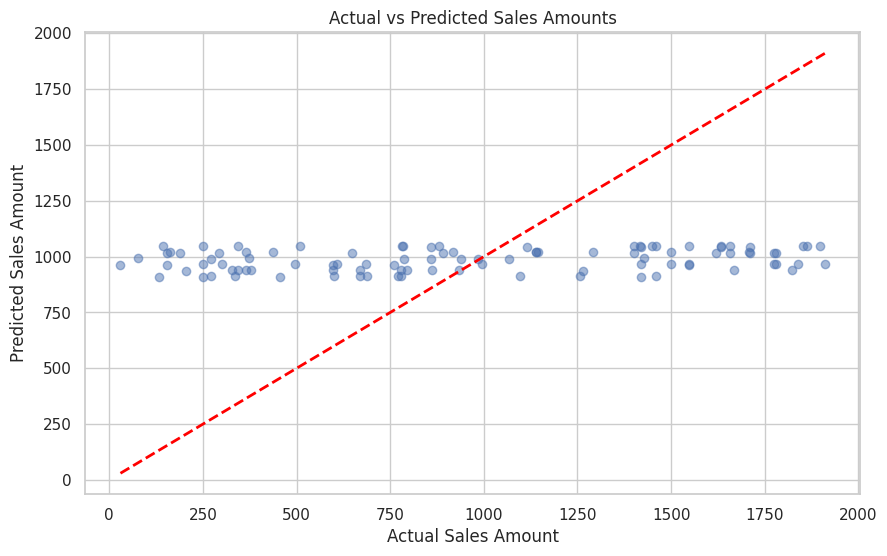

Mean Squared Error: 303297.1352797181
R-squared: 0.03761017001324163


In [78]:
# Feature selection
features = [ 'ProductRatings', 'CustomerLocation_encoded']
target = 'SalesAmount'

# Separate features and target variable
X = clothing_data[features]
y = clothing_data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Visualize the predictions against actual sales amounts
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Sales Amounts')
plt.xlabel('Actual Sales Amount')
plt.ylabel('Predicted Sales Amount')
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

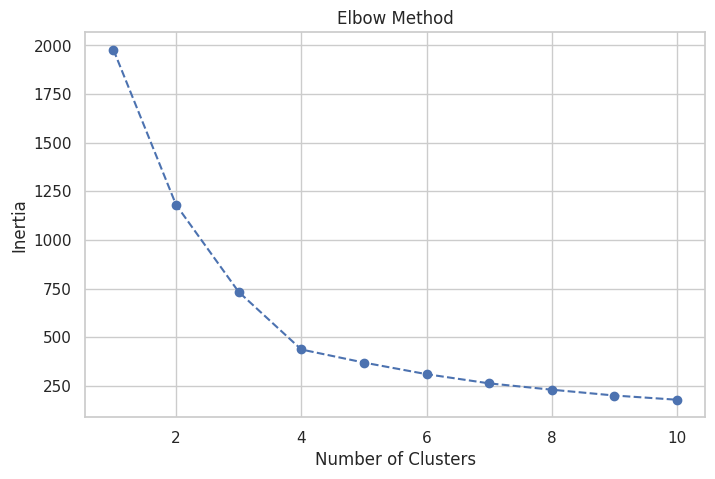

         SalesAmount  CustomerAge  ProductRatings  Month  \
cluster                                                    
0            1447.67        28.87            2.97   6.58   
1             514.72        28.50            2.95   6.42   
2             492.01        28.16            2.92   6.50   
3            1433.07        27.80            3.00   6.48   

         CustomerGender_encoded  ProductCategory_encoded  
cluster                                                   
0                          0.55                     1.05  
1                          0.59                     0.96  
2                          0.59                     0.97  
3                          0.53                     0.97  


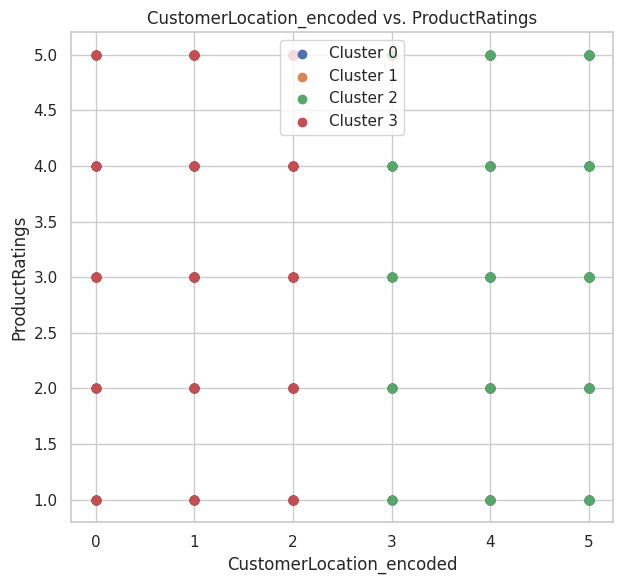

In [86]:


# Select relevant features for clustering
X = df[['SalesAmount', 'CustomerLocation_encoded']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
# In this example, let's iterate from 1 to 10 clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method to visualize the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Based on the Elbow Method, select the optimal number of clusters
k_optimal = 4

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['cluster'] = clusters

# Analyze the characteristics of each cluster
cluster_means = df.groupby('cluster').mean()
print(cluster_means)

# Visualize clusters
plt.figure(figsize=(12, 6))

# Scatter plot for age vs. income
plt.subplot(1, 2, 1)
for cluster in range(4):
    plt.scatter(df[df['cluster'] == cluster]['CustomerLocation_encoded'], df[df['cluster'] == cluster]['ProductRatings'], label=f'Cluster {cluster}')
plt.xlabel('CustomerLocation_encoded')
plt.ylabel('ProductRatings')
plt.title('CustomerLocation_encoded vs. ProductRatings')
plt.legend()

plt.tight_layout()
plt.show()